
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

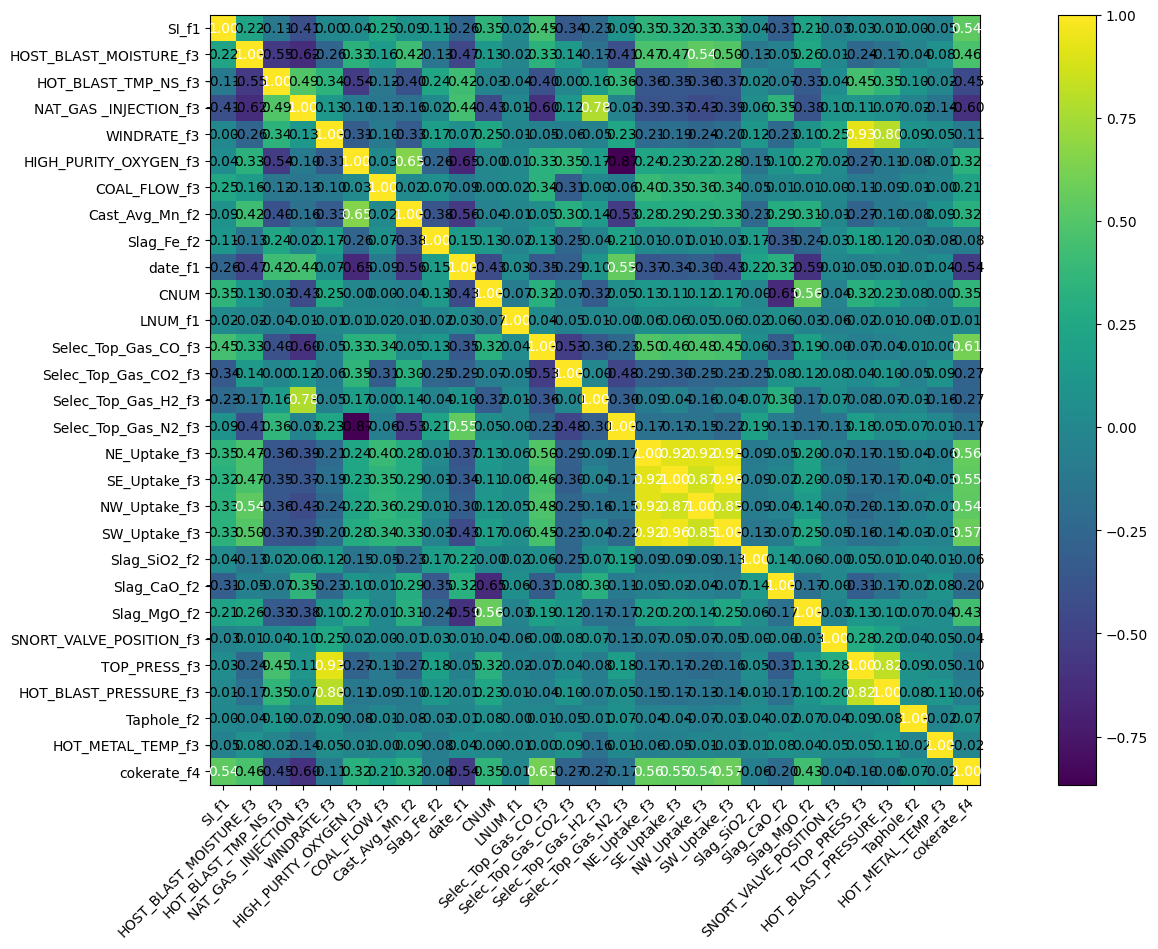

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

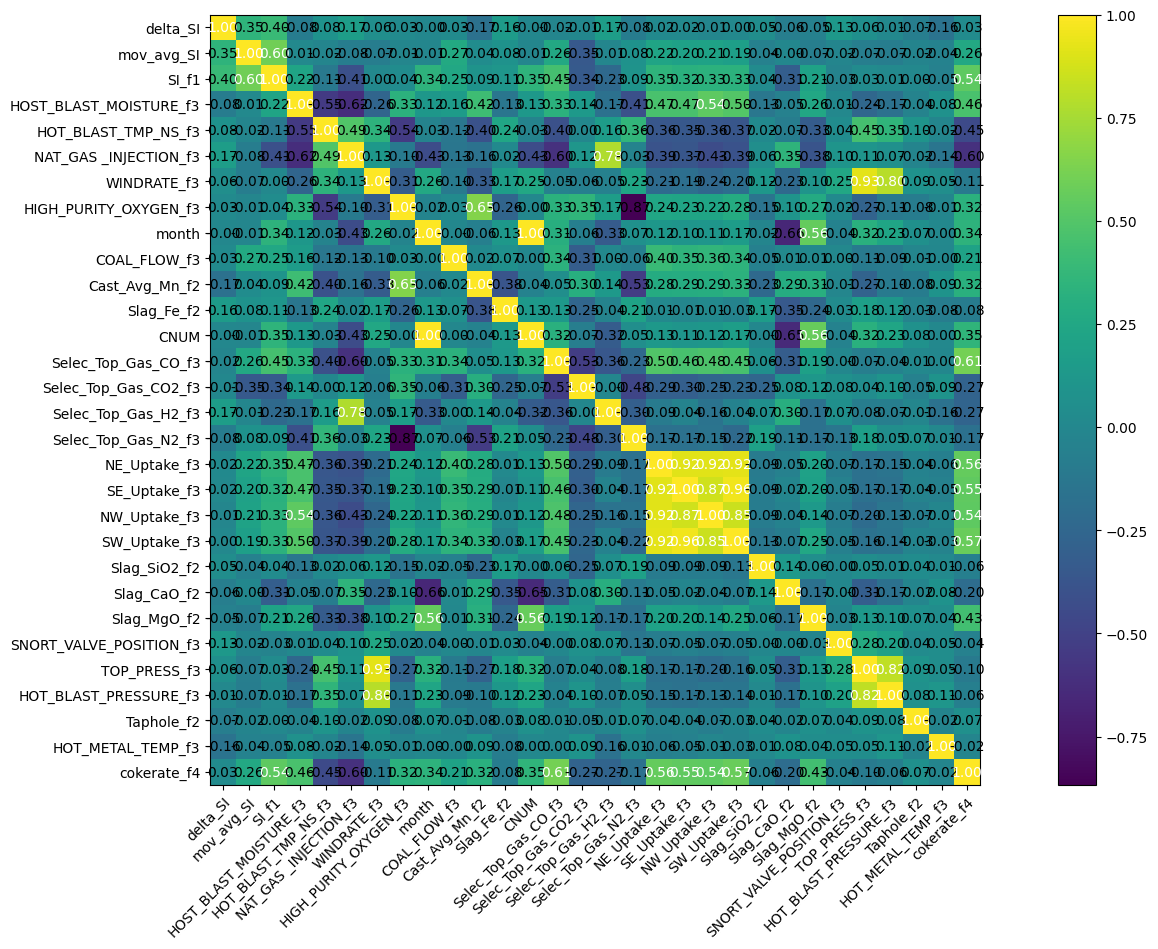

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 0.9
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ## smoothness_loss = F.mse_loss(idx_pred[:, 1:], idx_pred[:, :-1])

        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 100 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test


In [24]:

 inferenceGPT_obj.initialize_preds_lists()



## Run 1


In [25]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.153628
Loss_SI: 1.161436676979065 Loss_all: 1.1471810340881348
===


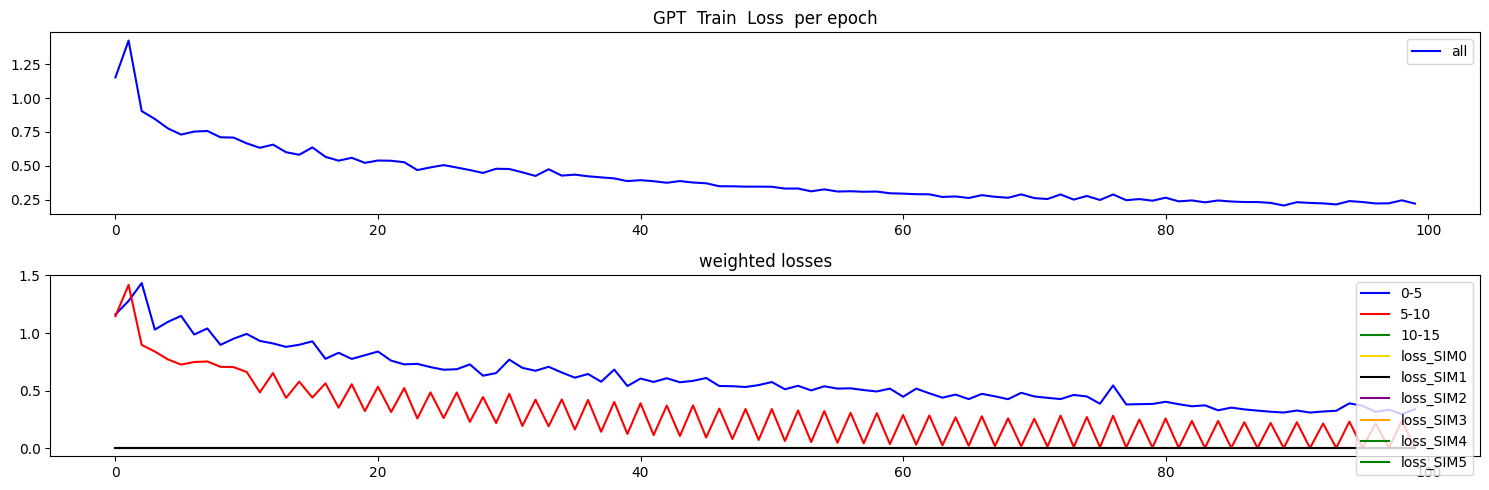

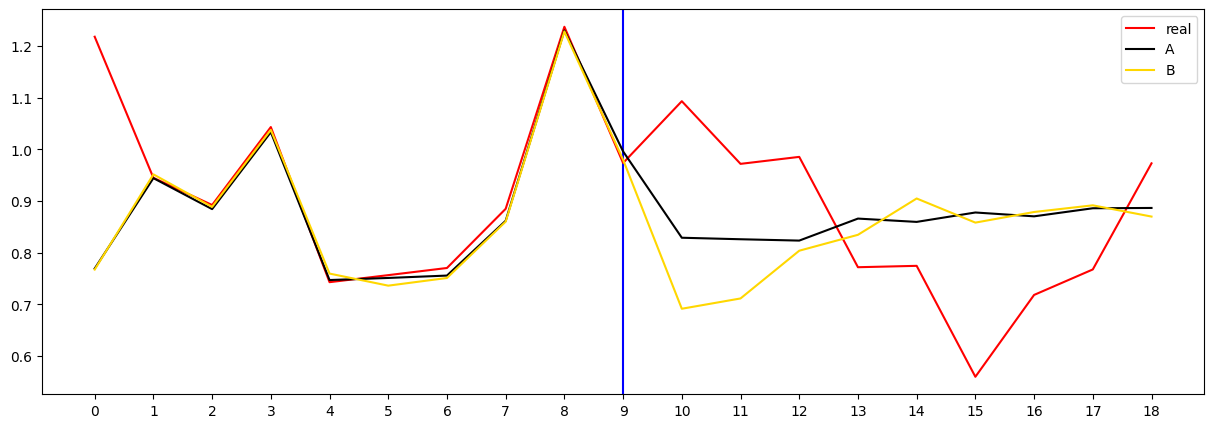

Which prediction is better? (A/B/skip): a
Saved preference.


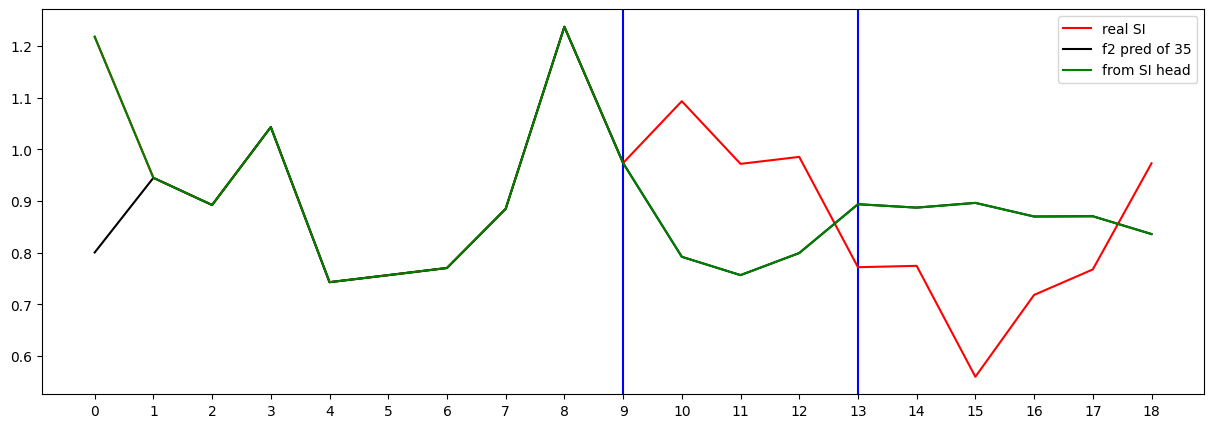

Testing R**2 - (all) - (no inputs):  0.9930944801014198
Testing R**2 - (f2) - SI full (no inputs):  -0.3383485393918122
Testing R**2 - SI head only (no inputs):  -0.3383485393918122
0 ...index R**2 (no inputs):  -0.09176897332526646
1 ...index R**2 (no inputs):  -0.2669565897700217
2 ...index R**2 (no inputs):  -0.3383485393918122
3 ...index R**2 (no inputs):  -279.3336925980892
4 ...index R**2 (no inputs):  -10.212219643252215
5 ...index R**2 (no inputs):  -2886.4728860792193
6 ...index R**2 (no inputs):  -46.985375011570234
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.43195231107984355
10 ...index R**2 (no inputs):  -0.06438485996560916
11 ...index R**2 (no inputs):  -52.93559786701023
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4714218135848398
16 ...index R**2 (no inputs):  -0.7381615226295479
17 ...index R**2 (no inputs):  -54.56206

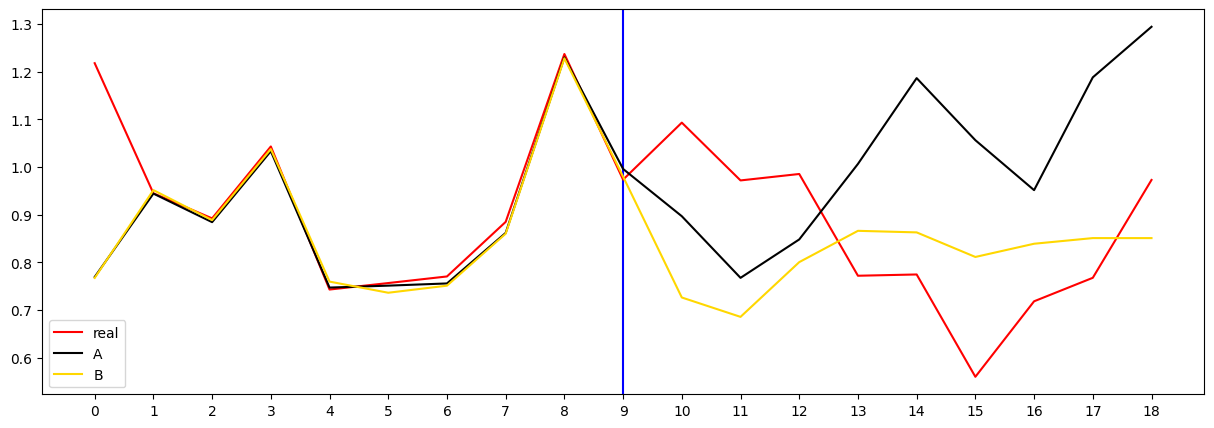

Which prediction is better? (A/B/skip): a
Saved preference.


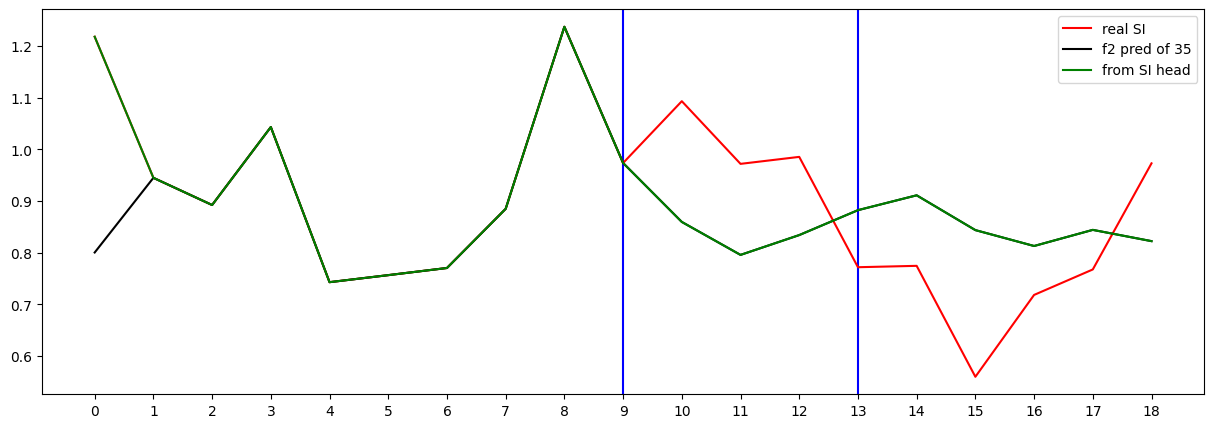

Testing R**2 - (all) - (no inputs):  0.9925356270748718
Testing R**2 - (f2) - SI full (no inputs):  -0.2488532600082618
Testing R**2 - SI head only (no inputs):  -0.2488532600082618
0 ...index R**2 (no inputs):  -0.21071249160489547
1 ...index R**2 (no inputs):  -0.6598934539838279
2 ...index R**2 (no inputs):  -0.2488532600082618
3 ...index R**2 (no inputs):  -24.676590491976974
4 ...index R**2 (no inputs):  -34.079132032577256
5 ...index R**2 (no inputs):  -3088.6801692647714
6 ...index R**2 (no inputs):  -128.0544631138426
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.24147305893970938
10 ...index R**2 (no inputs):  0.0043893100264029705
11 ...index R**2 (no inputs):  -503.9310469547411
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2668245663413265
16 ...index R**2 (no inputs):  -0.23513050734789553
17 ...index R**2 (no inputs):  -330.58

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences


res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )



[0] Train Loss: 1.244126
Loss_SI: 1.2419341802597046 Loss_all: 1.2374577522277832
===


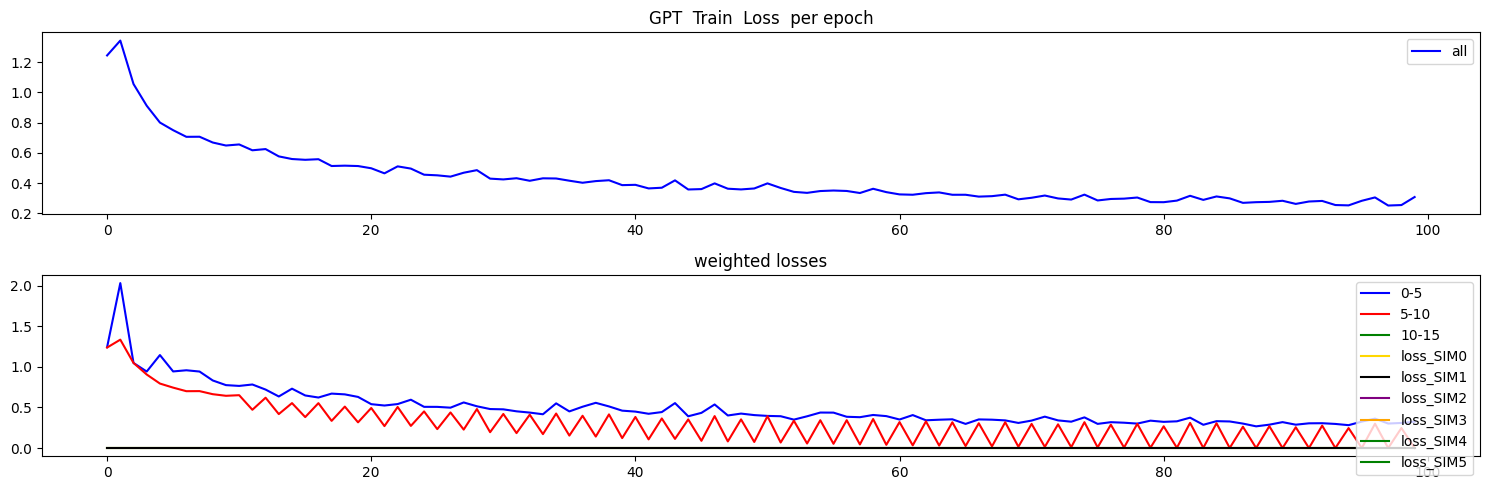

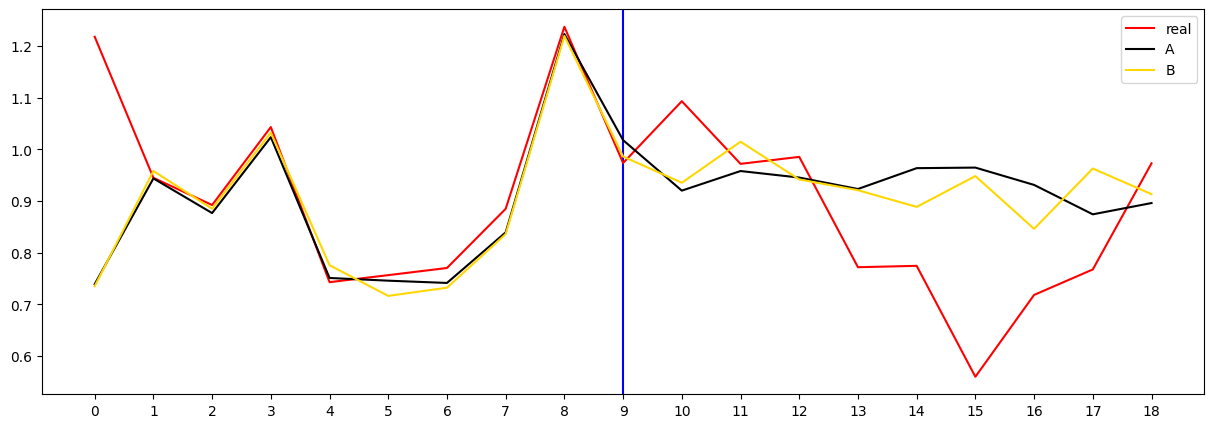

Which prediction is better? (A/B/skip): b
Saved preference.


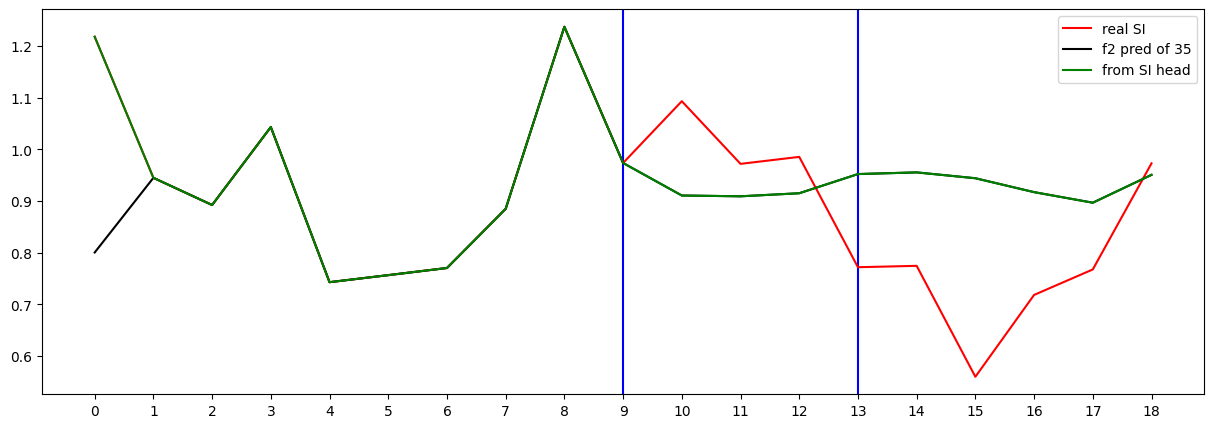

Testing R**2 - (all) - (no inputs):  0.9936027238116352
Testing R**2 - (f2) - SI full (no inputs):  -0.21714675289277996
Testing R**2 - SI head only (no inputs):  -0.21714675289277996
0 ...index R**2 (no inputs):  -0.03576506568239113
1 ...index R**2 (no inputs):  0.3150826301322226
2 ...index R**2 (no inputs):  -0.21714675289277996
3 ...index R**2 (no inputs):  -26.33009608681481
4 ...index R**2 (no inputs):  -13.154238136532427
5 ...index R**2 (no inputs):  -2667.8775164930453
6 ...index R**2 (no inputs):  -43.209356014603834
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05659420932062398
10 ...index R**2 (no inputs):  -0.0965469587597454
11 ...index R**2 (no inputs):  -84.00478097873989
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7852734320629235
16 ...index R**2 (no inputs):  -0.053301960221568745
17 ...index R**2 (no inputs):  -129.1

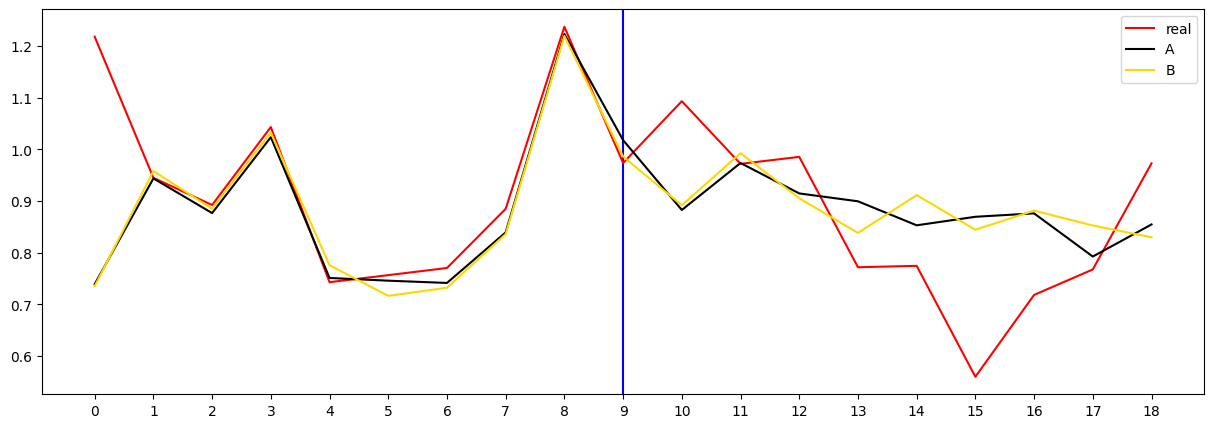

Which prediction is better? (A/B/skip): s


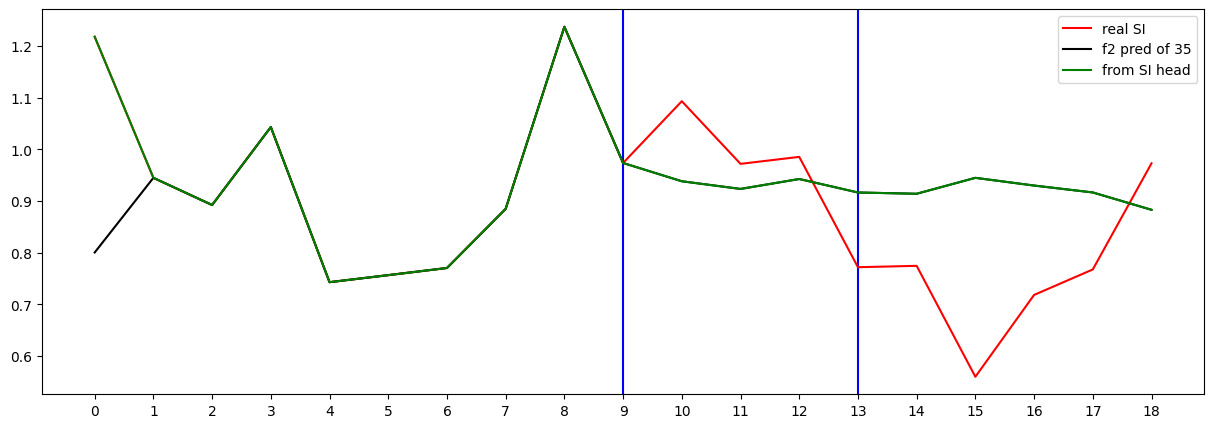

Testing R**2 - (all) - (no inputs):  0.8991994872181828
Testing R**2 - (f2) - SI full (no inputs):  -0.2306570438991462
Testing R**2 - SI head only (no inputs):  -0.2306570438991462
0 ...index R**2 (no inputs):  -0.06662885909478344
1 ...index R**2 (no inputs):  -0.3327778065834375
2 ...index R**2 (no inputs):  -0.2306570438991462
3 ...index R**2 (no inputs):  -3269.164098719224
4 ...index R**2 (no inputs):  -161.83840757308562
5 ...index R**2 (no inputs):  -42073.74596421047
6 ...index R**2 (no inputs):  -44.61326708071602
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.15404219015168086
10 ...index R**2 (no inputs):  -0.5667053460688165
11 ...index R**2 (no inputs):  -5330.415561460382
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.677799274595364
16 ...index R**2 (no inputs):  -0.4102560697887674
17 ...index R**2 (no inputs):  -2175.2539228

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




[0] Train Loss: 1.170339
Loss_SI: 1.0758637189865112 Loss_all: 1.1637564897537231
===


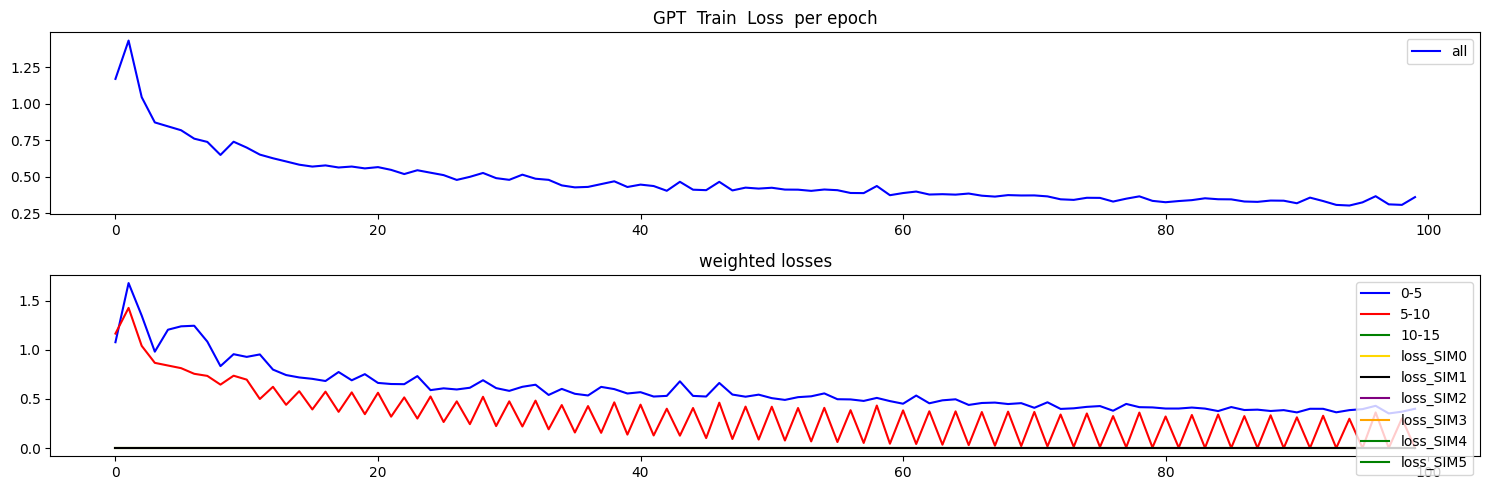

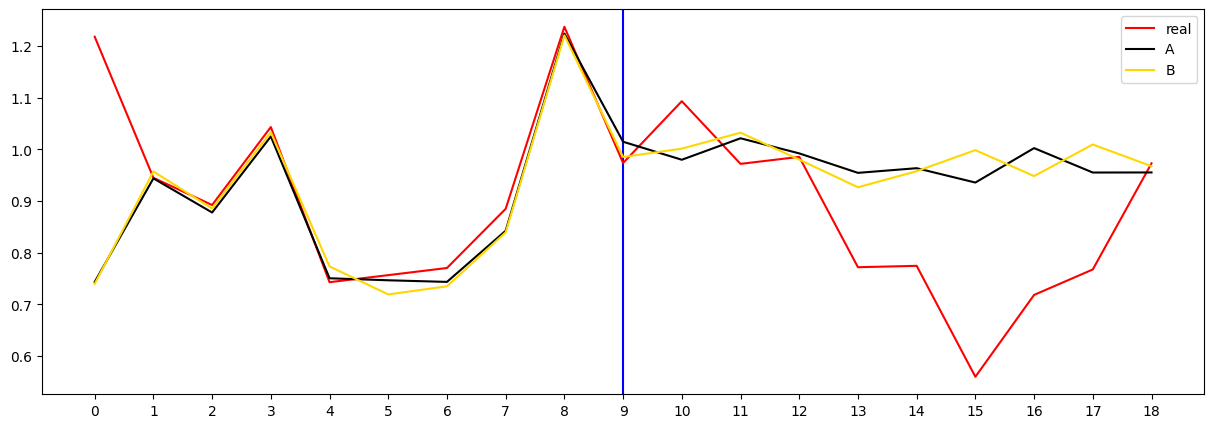

Which prediction is better? (A/B/skip): s


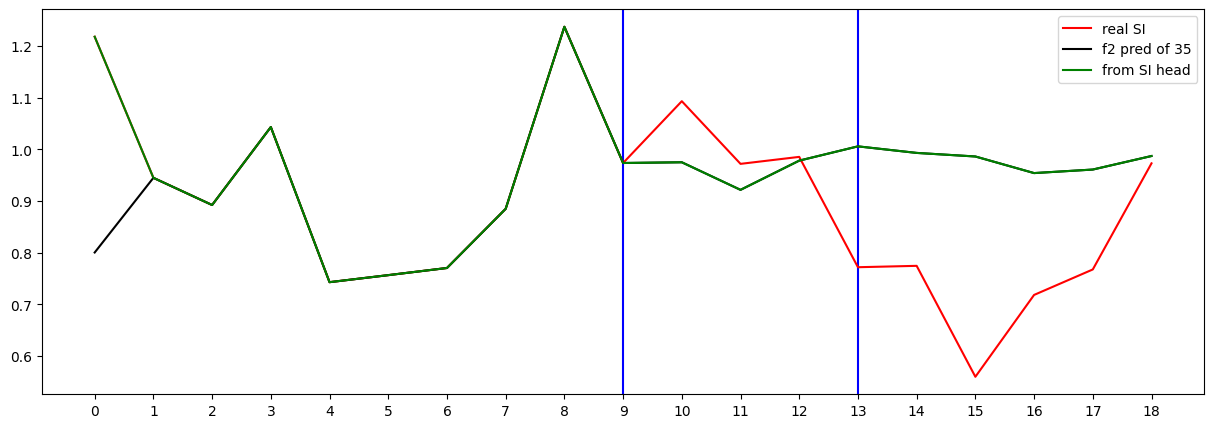

Testing R**2 - (all) - (no inputs):  0.9884686083009729
Testing R**2 - (f2) - SI full (no inputs):  -0.47825171446040016
Testing R**2 - SI head only (no inputs):  -0.47825171446040016
0 ...index R**2 (no inputs):  -0.17843838861779182
1 ...index R**2 (no inputs):  -0.1628034194972312
2 ...index R**2 (no inputs):  -0.47825171446040016
3 ...index R**2 (no inputs):  -79.38168704898968
4 ...index R**2 (no inputs):  -6.962539062615947
5 ...index R**2 (no inputs):  -4821.891332745707
6 ...index R**2 (no inputs):  -43.585237879210624
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.02942139179295089
10 ...index R**2 (no inputs):  -0.21364496870889793
11 ...index R**2 (no inputs):  -290.72395446678775
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6336820209166478
16 ...index R**2 (no inputs):  0.003411902179489279
17 ...index R**2 (no inputs):  -159.28

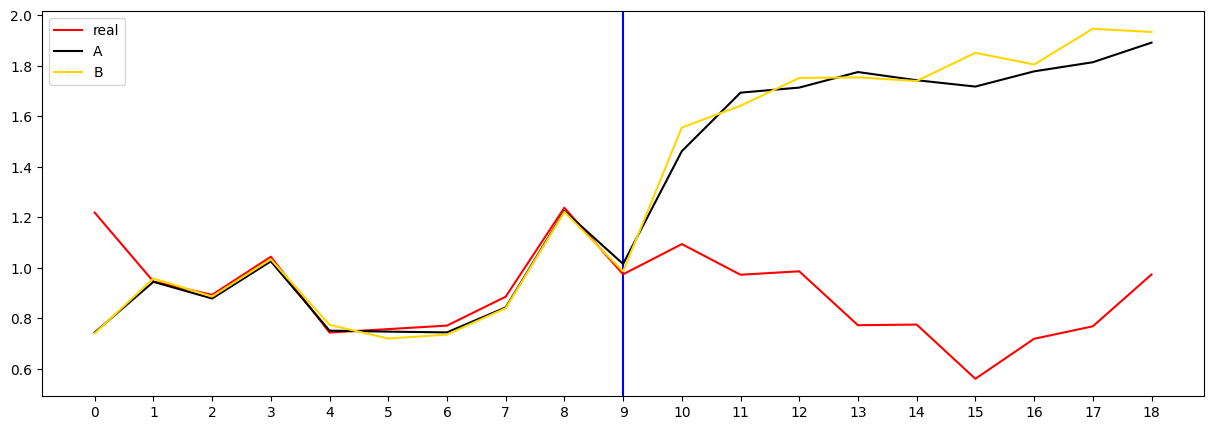

Which prediction is better? (A/B/skip): s


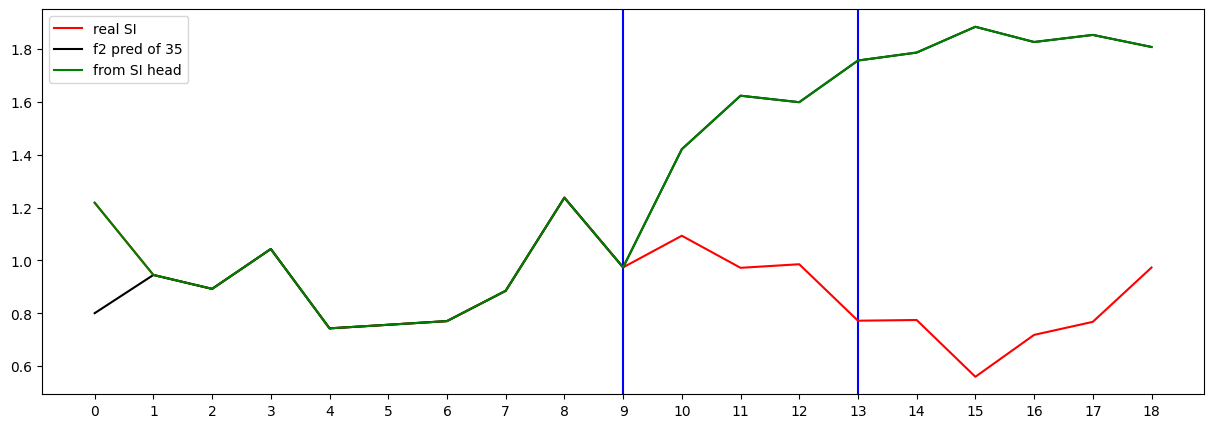

Testing R**2 - (all) - (no inputs):  0.8189020739473987
Testing R**2 - (f2) - SI full (no inputs):  -23.278814359216064
Testing R**2 - SI head only (no inputs):  -23.278814359216064
0 ...index R**2 (no inputs):  -0.6622746176851393
1 ...index R**2 (no inputs):  -39.814038252381074
2 ...index R**2 (no inputs):  -23.278814359216064
3 ...index R**2 (no inputs):  -11337.03688953033
4 ...index R**2 (no inputs):  -2126.7985976939794
5 ...index R**2 (no inputs):  -75902.87377589784
6 ...index R**2 (no inputs):  -32.43245120317829
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.002602605385830792
10 ...index R**2 (no inputs):  -0.05976697163758993
11 ...index R**2 (no inputs):  -13.017368966613045
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9180871025745851
16 ...index R**2 (no inputs):  -0.01583970658407874
17 ...index R**2 (no inputs):  -1098.2875

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.353132
Loss_SI: 1.491690993309021 Loss_all: 1.3464962244033813
===


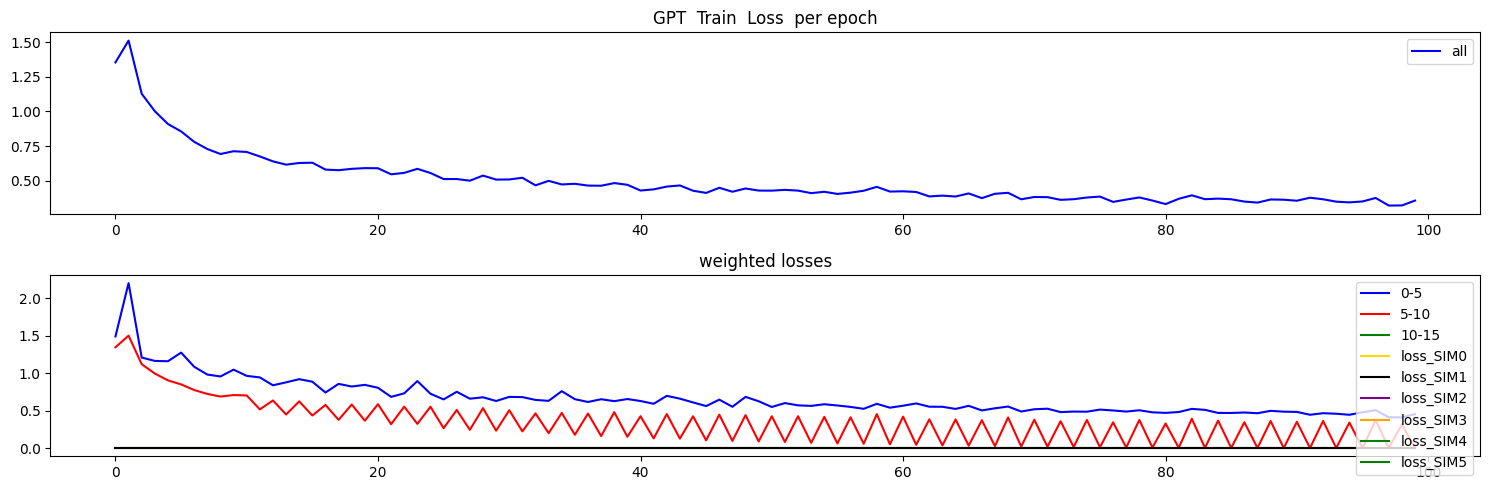

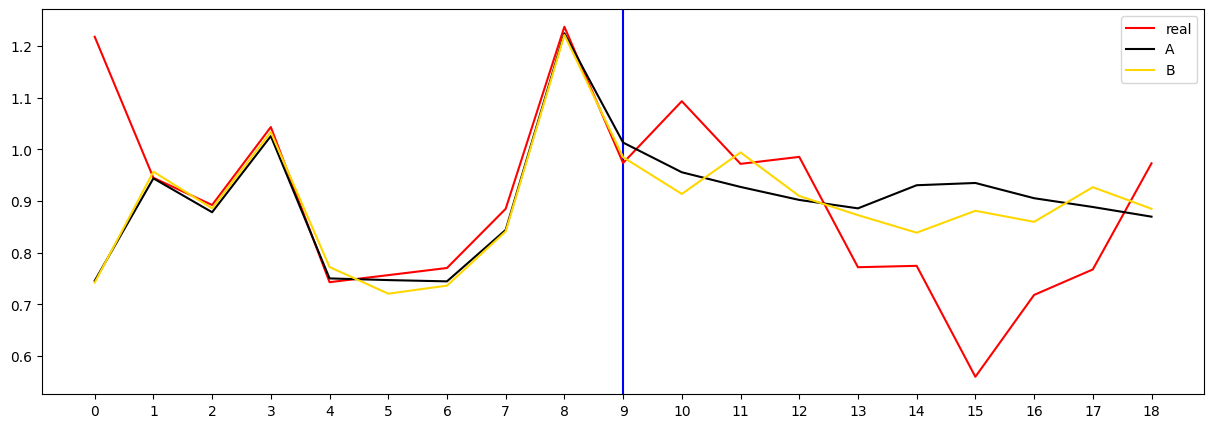

Which prediction is better? (A/B/skip): b
Saved preference.


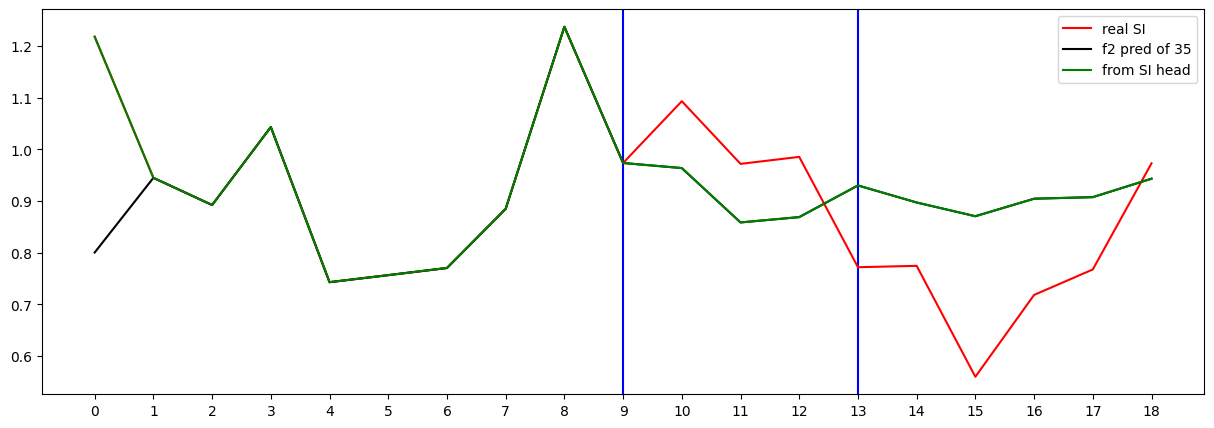

Testing R**2 - (all) - (no inputs):  0.9944509750912243
Testing R**2 - (f2) - SI full (no inputs):  0.05834759233676434
Testing R**2 - SI head only (no inputs):  0.05834759233676434
0 ...index R**2 (no inputs):  -0.1981448099126204
1 ...index R**2 (no inputs):  0.26626266705792556
2 ...index R**2 (no inputs):  0.05834759233676434
3 ...index R**2 (no inputs):  -424.57340430709206
4 ...index R**2 (no inputs):  -8.308442322758436
5 ...index R**2 (no inputs):  -2311.9678818844036
6 ...index R**2 (no inputs):  -49.67327668962957
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.022470237300876272
10 ...index R**2 (no inputs):  -0.4905722093212519
11 ...index R**2 (no inputs):  -204.93509622688558
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.19611220445843447
16 ...index R**2 (no inputs):  -0.028639587150586898
17 ...index R**2 (no inputs):  -52.926

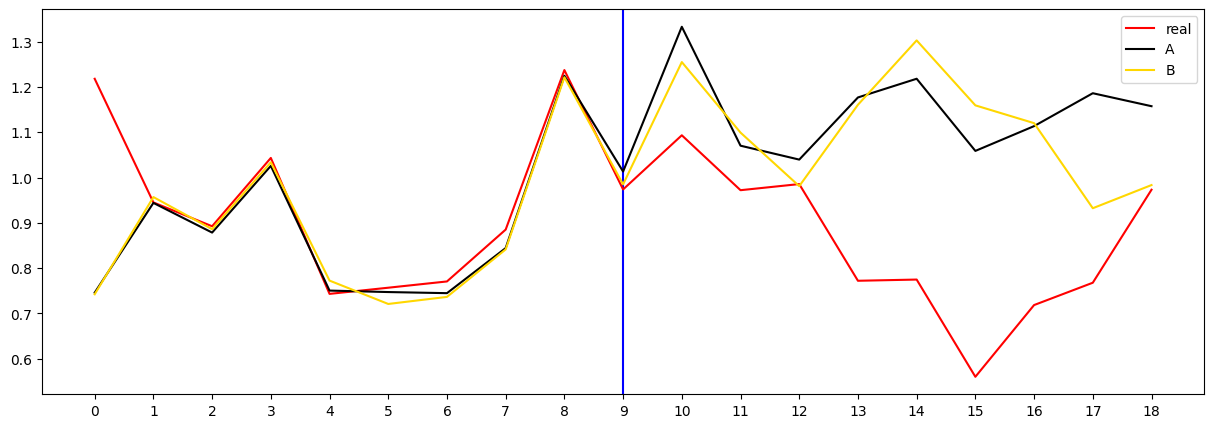

Which prediction is better? (A/B/skip): b
Saved preference.


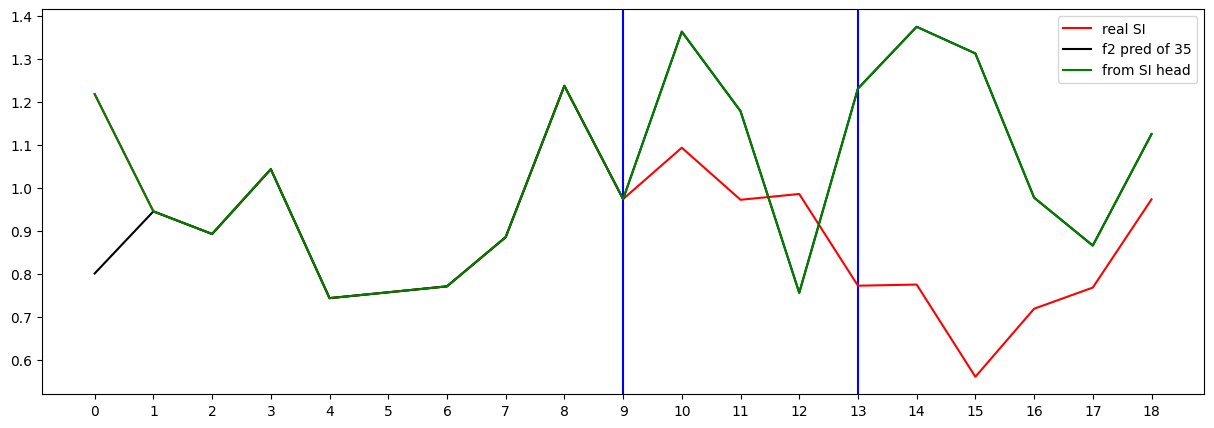

Testing R**2 - (all) - (no inputs):  0.9208918262389124
Testing R**2 - (f2) - SI full (no inputs):  -3.8862730002295667
Testing R**2 - SI head only (no inputs):  -3.8862730002295667
0 ...index R**2 (no inputs):  -1.5909312388070118
1 ...index R**2 (no inputs):  -9.440035915698395
2 ...index R**2 (no inputs):  -3.8862730002295667
3 ...index R**2 (no inputs):  -793.9123926088059
4 ...index R**2 (no inputs):  -382.76202954189387
5 ...index R**2 (no inputs):  -32638.303301307868
6 ...index R**2 (no inputs):  -34.250904773149756
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3025054199406123
10 ...index R**2 (no inputs):  -1.6570542295281778
11 ...index R**2 (no inputs):  -400.5170912993157
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4270046202407545
16 ...index R**2 (no inputs):  -0.00901224412461099
17 ...index R**2 (no inputs):  -6127.062233

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.309447
Loss_SI: 1.3472871780395508 Loss_all: 1.3027201890945435
===


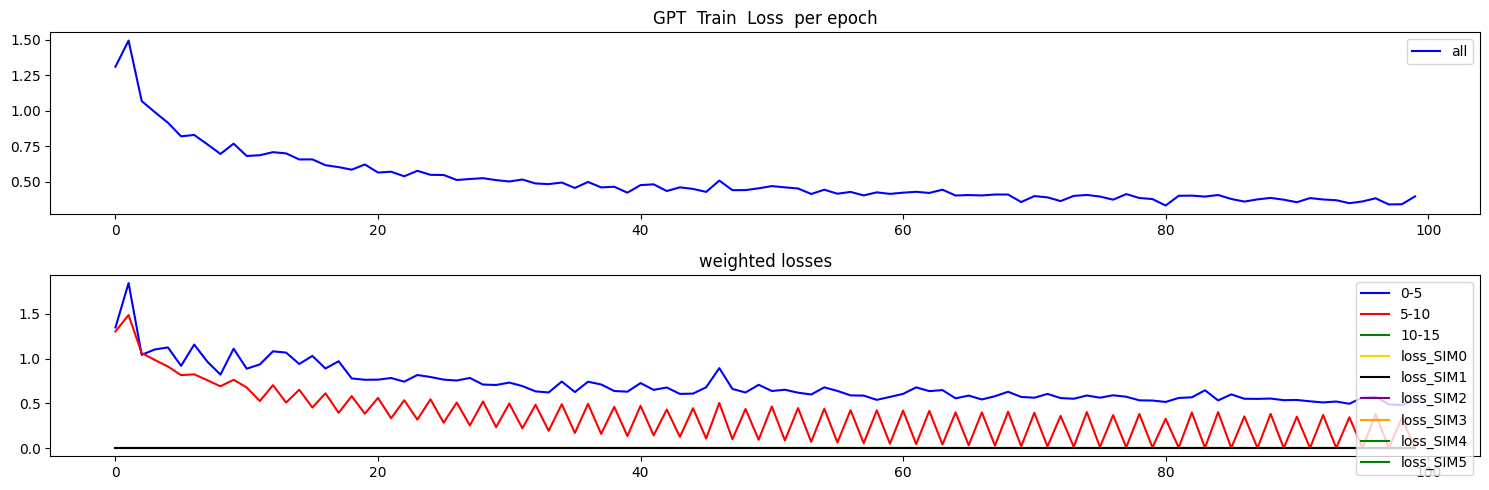

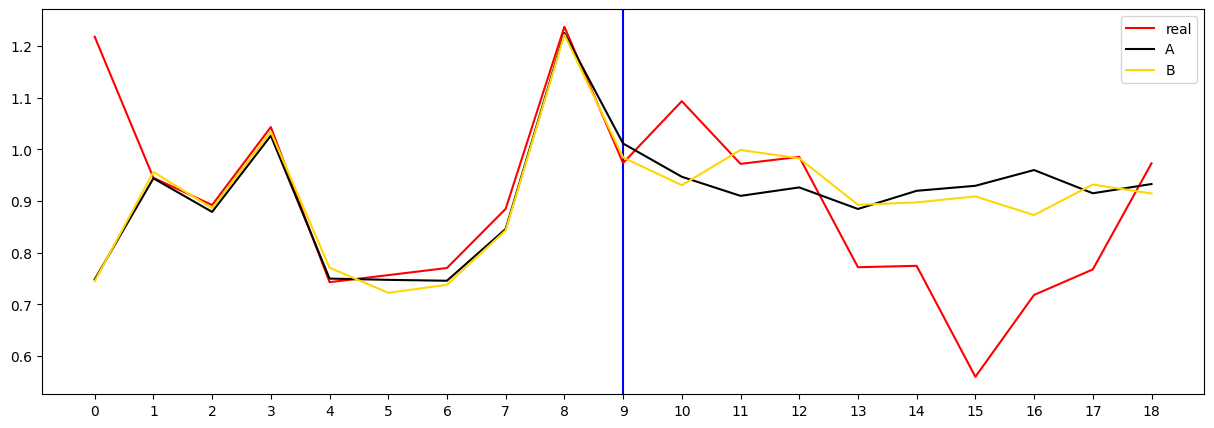

Which prediction is better? (A/B/skip): b
Saved preference.


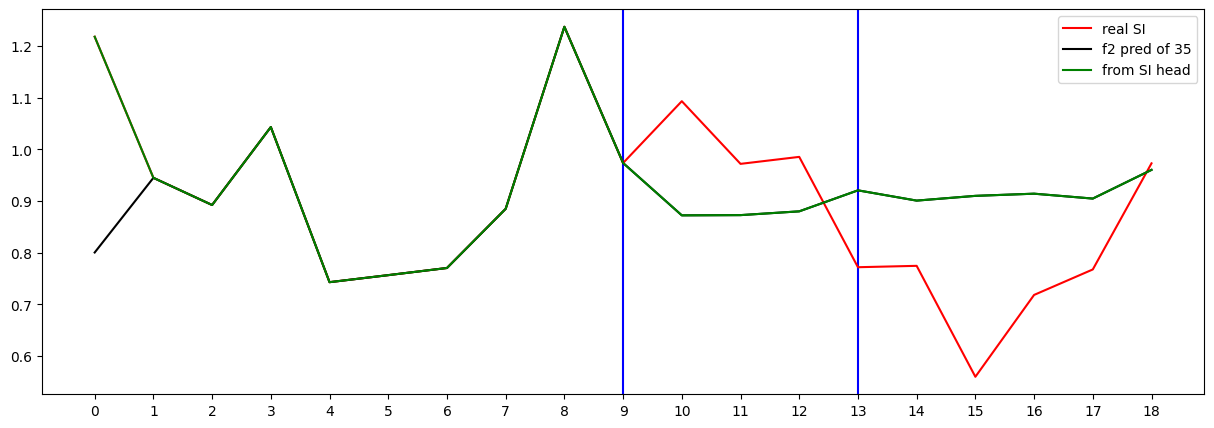

Testing R**2 - (all) - (no inputs):  0.9939168246154192
Testing R**2 - (f2) - SI full (no inputs):  0.005617302655599454
Testing R**2 - SI head only (no inputs):  0.005617302655599454
0 ...index R**2 (no inputs):  -0.065706177774848
1 ...index R**2 (no inputs):  0.04609704591944552
2 ...index R**2 (no inputs):  0.005617302655599454
3 ...index R**2 (no inputs):  -88.69829053074328
4 ...index R**2 (no inputs):  -26.18530227131223
5 ...index R**2 (no inputs):  -2536.560239386417
6 ...index R**2 (no inputs):  -35.62162312352012
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09419308796658754
10 ...index R**2 (no inputs):  -0.21210878775662745
11 ...index R**2 (no inputs):  -403.4393386138819
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.123298951124027
16 ...index R**2 (no inputs):  -0.04661719933468933
17 ...index R**2 (no inputs):  -45.3105853

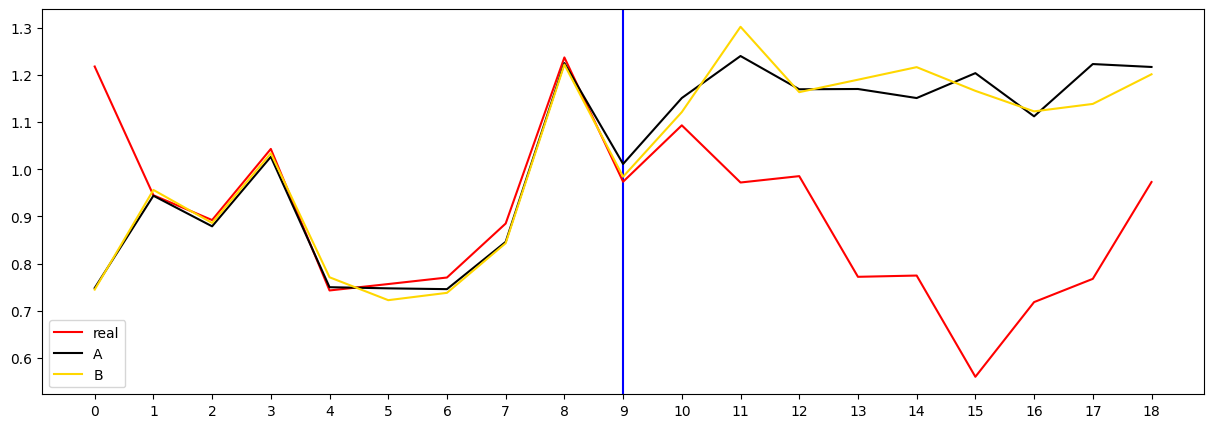

Which prediction is better? (A/B/skip): s


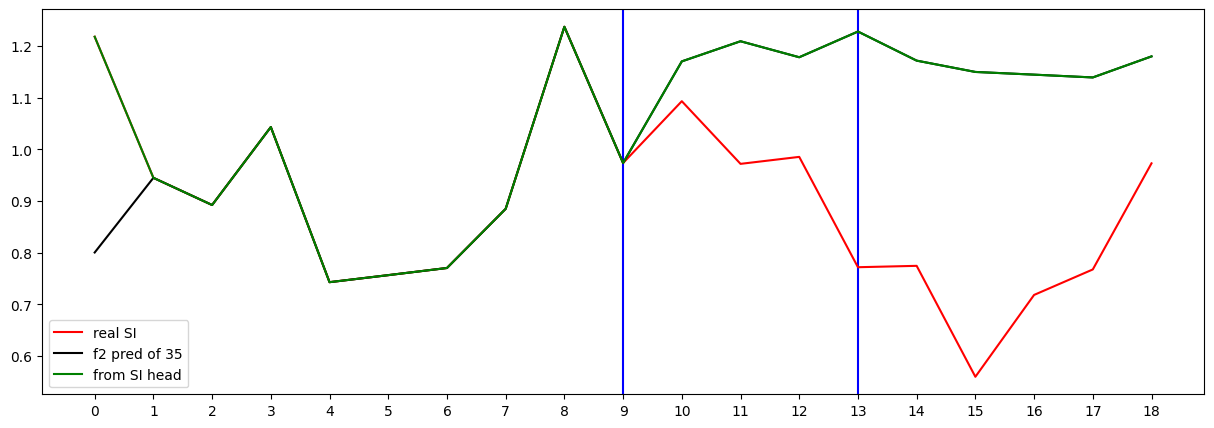

Testing R**2 - (all) - (no inputs):  0.9707675035738826
Testing R**2 - (f2) - SI full (no inputs):  -2.9346460090646964
Testing R**2 - SI head only (no inputs):  -2.9346460090646964
0 ...index R**2 (no inputs):  -1.5195879899807125
1 ...index R**2 (no inputs):  -1.5896862158939618
2 ...index R**2 (no inputs):  -2.9346460090646964
3 ...index R**2 (no inputs):  -1549.4798469996701
4 ...index R**2 (no inputs):  -773.944217709694
5 ...index R**2 (no inputs):  -11886.614898762076
6 ...index R**2 (no inputs):  -8.295621070339081
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.10019002288656553
10 ...index R**2 (no inputs):  -0.22385515931249067
11 ...index R**2 (no inputs):  -1390.1431183349257
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.515092434811967
16 ...index R**2 (no inputs):  -0.2279578964741329
17 ...index R**2 (no inputs):  -3410.2874777

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




## Run 2


In [31]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.206892
Loss_SI: 1.0188214778900146 Loss_all: 1.2002274990081787
===


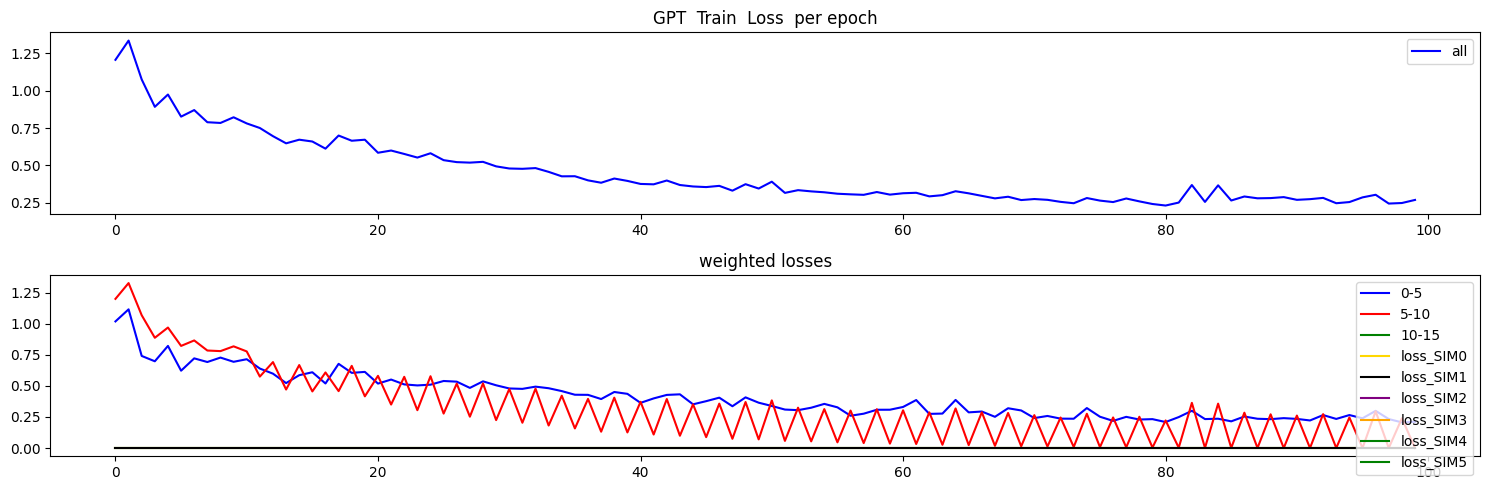

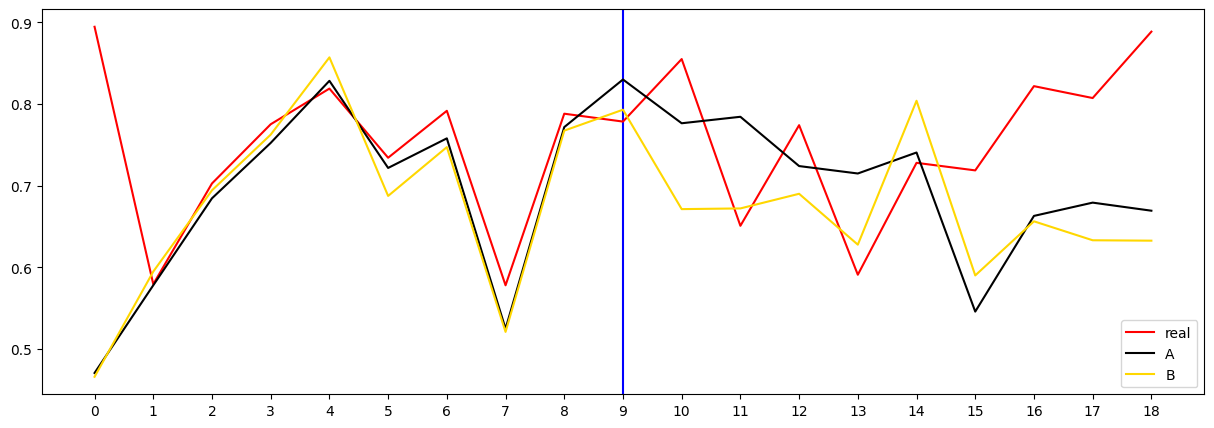

Which prediction is better? (A/B/skip): a
Saved preference.


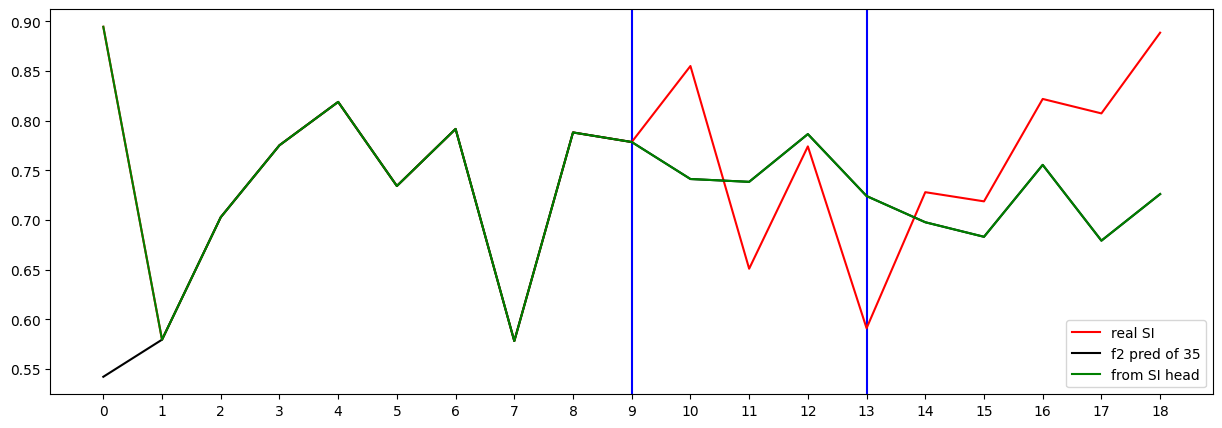

Testing R**2 - (all) - (no inputs):  0.9911427520801253
Testing R**2 - (f2) - SI full (no inputs):  -0.6948496893279095
Testing R**2 - SI head only (no inputs):  -0.6948496893279095
0 ...index R**2 (no inputs):  -0.5910221502767075
1 ...index R**2 (no inputs):  -0.7293858788121523
2 ...index R**2 (no inputs):  -0.6948496893279095
3 ...index R**2 (no inputs):  -3169.559164151569
4 ...index R**2 (no inputs):  -11.047874255913642
5 ...index R**2 (no inputs):  -44.490738891902886
6 ...index R**2 (no inputs):  -46.63227765894192
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6263793105545916
10 ...index R**2 (no inputs):  0.12752482233965556
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.11218560995321059
16 ...index R**2 (no inputs):  -0.3046085293546572
17 ...index R**2 (no inputs):  -98.67142842610677
18 ...in

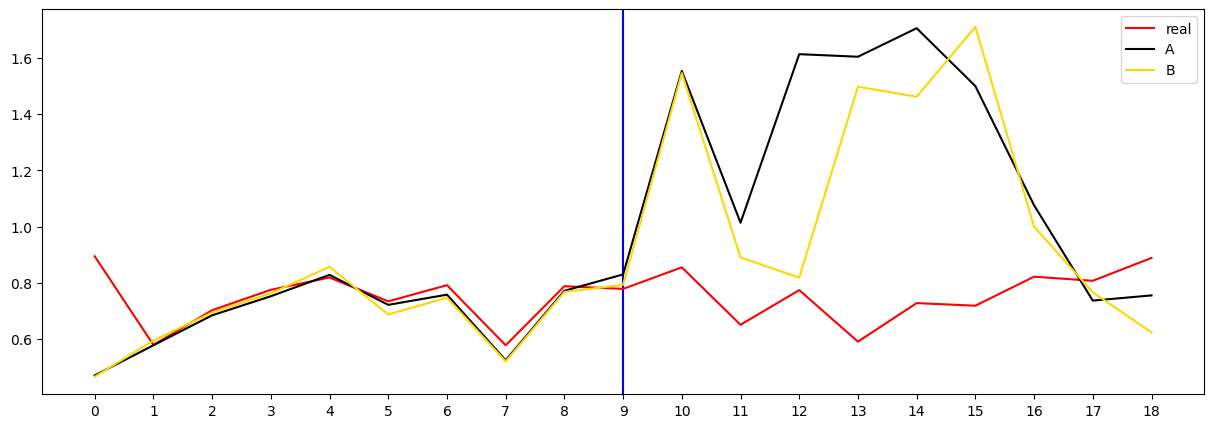

Which prediction is better? (A/B/skip): b
Saved preference.


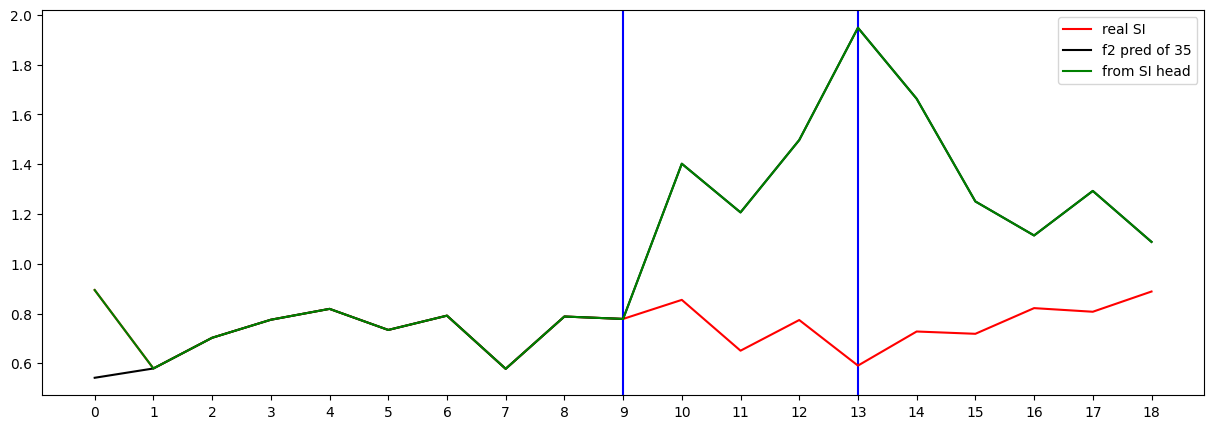

Testing R**2 - (all) - (no inputs):  0.9784419944111746
Testing R**2 - (f2) - SI full (no inputs):  -51.768063017656644
Testing R**2 - SI head only (no inputs):  -51.768063017656644
0 ...index R**2 (no inputs):  -11.185364630831955
1 ...index R**2 (no inputs):  -36.119813247207546
2 ...index R**2 (no inputs):  -51.768063017656644
3 ...index R**2 (no inputs):  -3263.820185336142
4 ...index R**2 (no inputs):  -1023.1524355050856
5 ...index R**2 (no inputs):  -109.48269859054861
6 ...index R**2 (no inputs):  -103.98725497642079
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.13455468556326555
10 ...index R**2 (no inputs):  -0.7021554551441069
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.112781381717999
16 ...index R**2 (no inputs):  -0.45866101680717297
17 ...index R**2 (no inputs):  -594.3267211914062
18 ...i

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.254312
Loss_SI: 1.3996922969818115 Loss_all: 1.2476569414138794
===


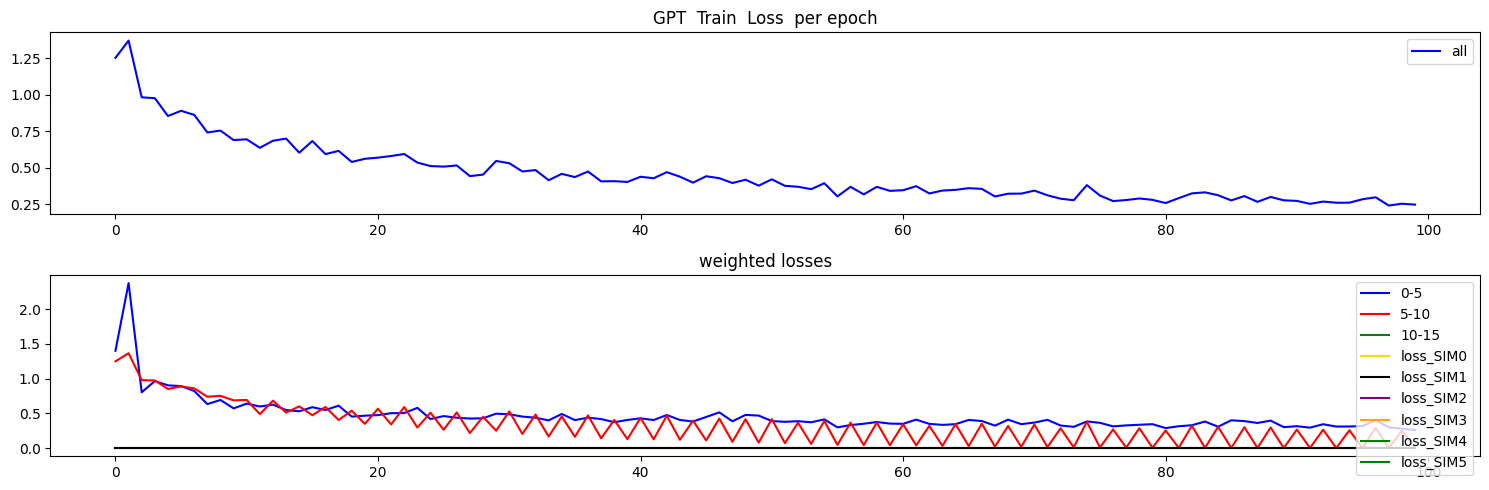

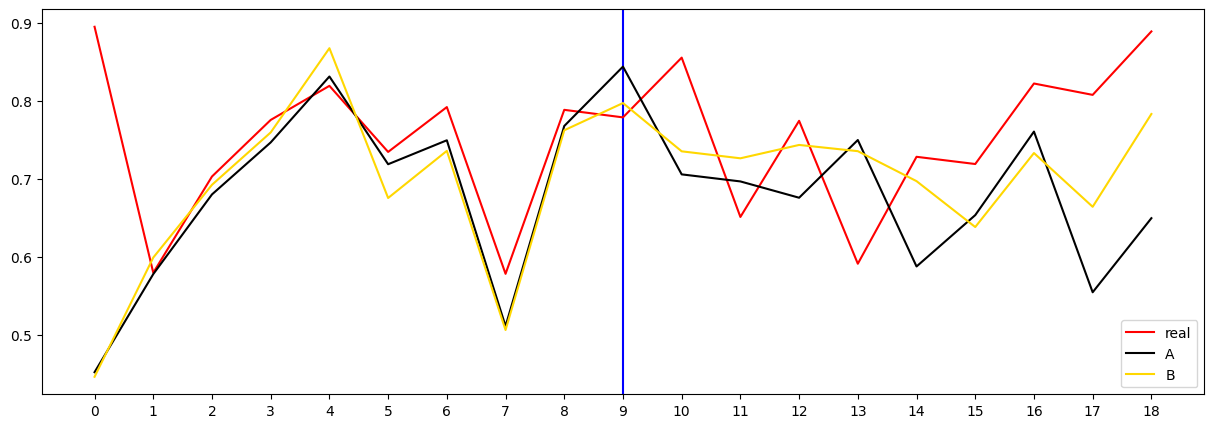

Which prediction is better? (A/B/skip): b
Saved preference.


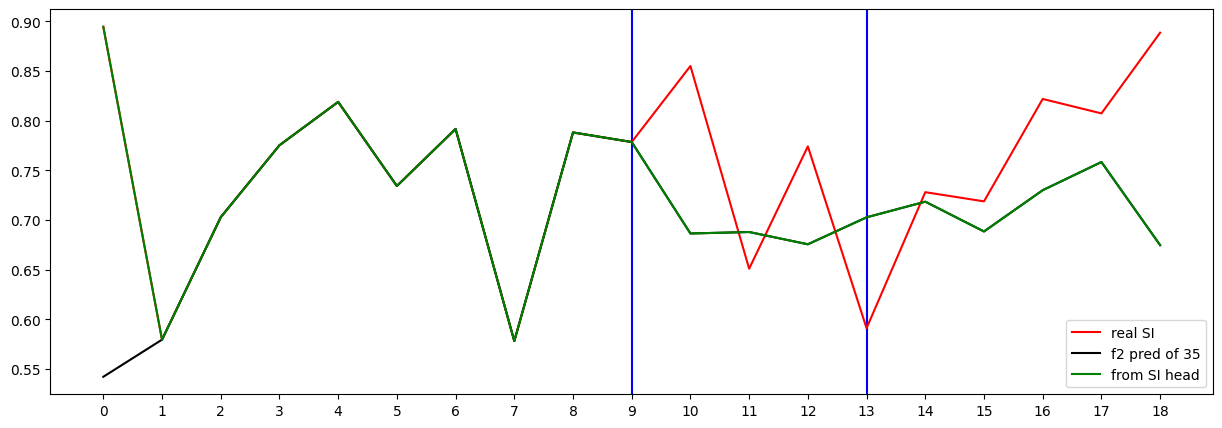

Testing R**2 - (all) - (no inputs):  0.994612755212632
Testing R**2 - (f2) - SI full (no inputs):  -0.2576833275789552
Testing R**2 - SI head only (no inputs):  -0.2576833275789552
0 ...index R**2 (no inputs):  -0.23118695851033721
1 ...index R**2 (no inputs):  -3.8577359345772777
2 ...index R**2 (no inputs):  -0.2576833275789552
3 ...index R**2 (no inputs):  -2645.0954539626027
4 ...index R**2 (no inputs):  -22.08790014917153
5 ...index R**2 (no inputs):  -26.609851612802156
6 ...index R**2 (no inputs):  -33.15645301916378
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05222764705914851
10 ...index R**2 (no inputs):  0.32499579728794104
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5595925424710553
16 ...index R**2 (no inputs):  -0.14642228487947806
17 ...index R**2 (no inputs):  -330.6675557454427
18 ...i

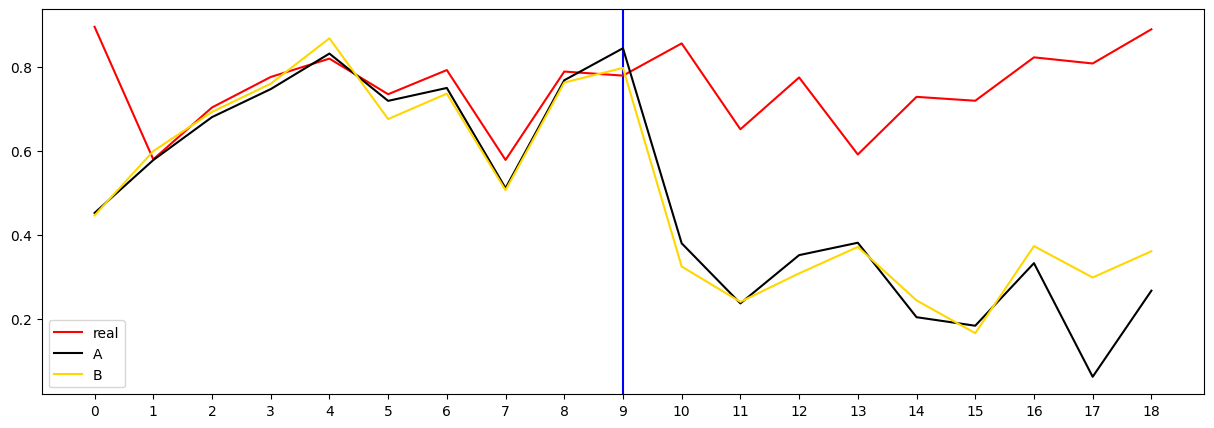

Which prediction is better? (A/B/skip): s


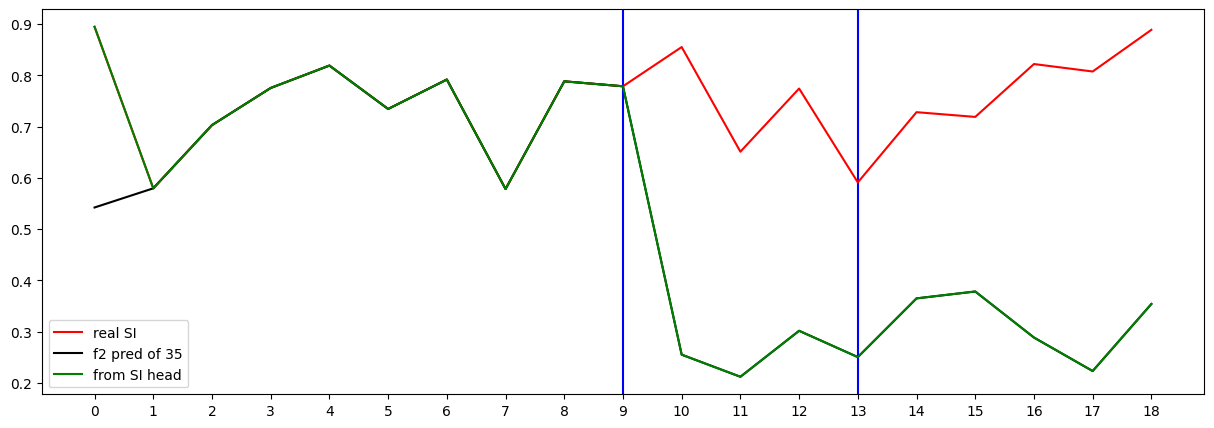

Testing R**2 - (all) - (no inputs):  0.9974157613807351
Testing R**2 - (f2) - SI full (no inputs):  -24.14880907717998
Testing R**2 - SI head only (no inputs):  -24.14880907717998
0 ...index R**2 (no inputs):  -1.68923477951064
1 ...index R**2 (no inputs):  -46.567176768056434
2 ...index R**2 (no inputs):  -24.14880907717998
3 ...index R**2 (no inputs):  -3617.5831399670983
4 ...index R**2 (no inputs):  -479.7572998858087
5 ...index R**2 (no inputs):  -12.021091812256778
6 ...index R**2 (no inputs):  -454.2318332453422
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3669047212509824
10 ...index R**2 (no inputs):  -0.1513133777550386
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5263661183049249
16 ...index R**2 (no inputs):  -0.2108114741769178
17 ...index R**2 (no inputs):  -447.83952792882917
18 ...index R

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
      
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.159146
Loss_SI: 1.3510100841522217 Loss_all: 1.1524546146392822
===


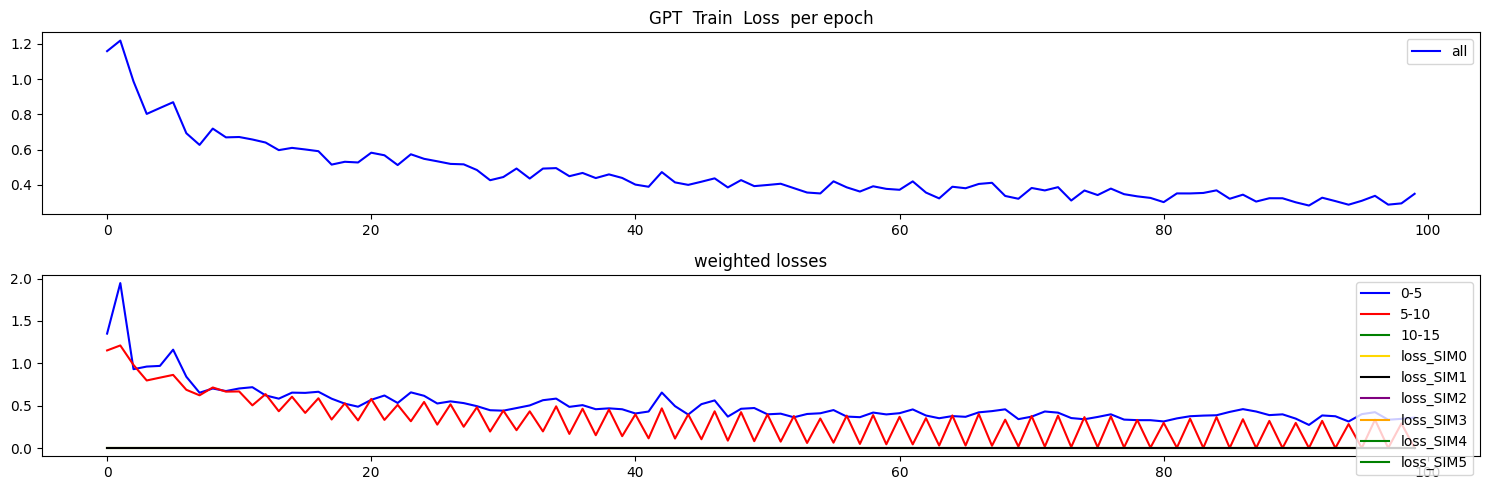

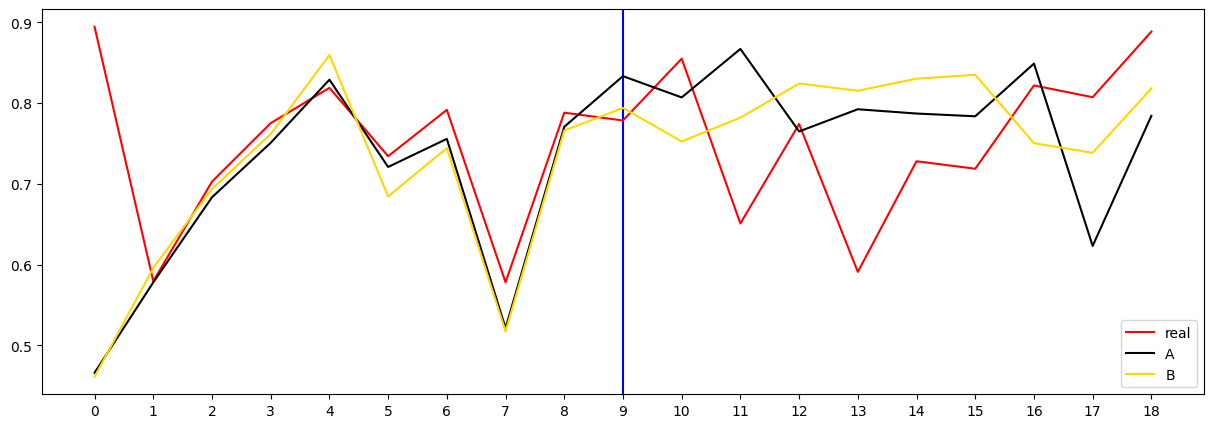

Which prediction is better? (A/B/skip): s


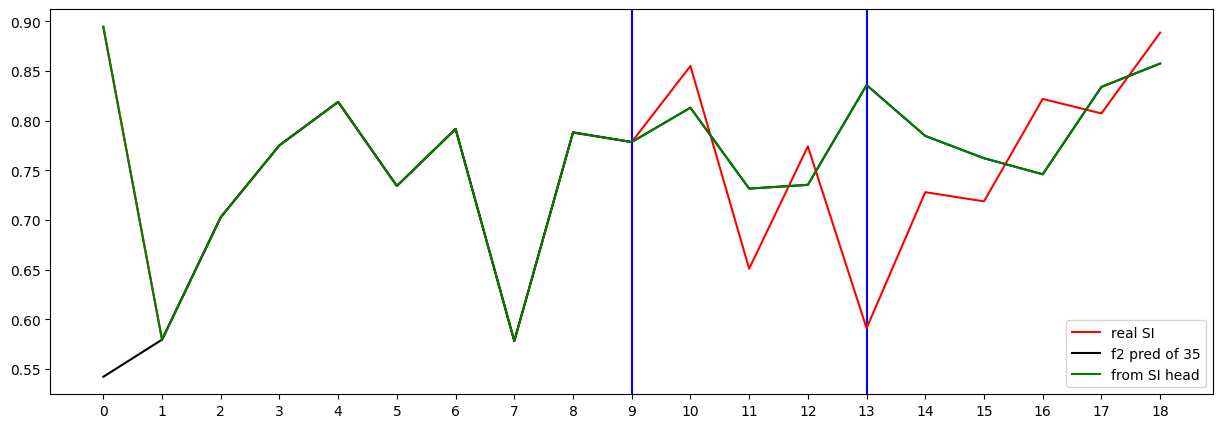

Testing R**2 - (all) - (no inputs):  0.991052929780809
Testing R**2 - (f2) - SI full (no inputs):  0.08778775812431072
Testing R**2 - SI head only (no inputs):  0.08778775812431072
0 ...index R**2 (no inputs):  0.032095681325600145
1 ...index R**2 (no inputs):  -1.59143980609797
2 ...index R**2 (no inputs):  0.08778775812431072
3 ...index R**2 (no inputs):  -2140.75986551518
4 ...index R**2 (no inputs):  -22.81606293513339
5 ...index R**2 (no inputs):  -44.901185048070424
6 ...index R**2 (no inputs):  -192.9153256750374
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.015456516456611613
10 ...index R**2 (no inputs):  0.27272359650713573
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.434159499998781
16 ...index R**2 (no inputs):  -0.26547125754766876
17 ...index R**2 (no inputs):  -432.22154744466144
18 ...inde

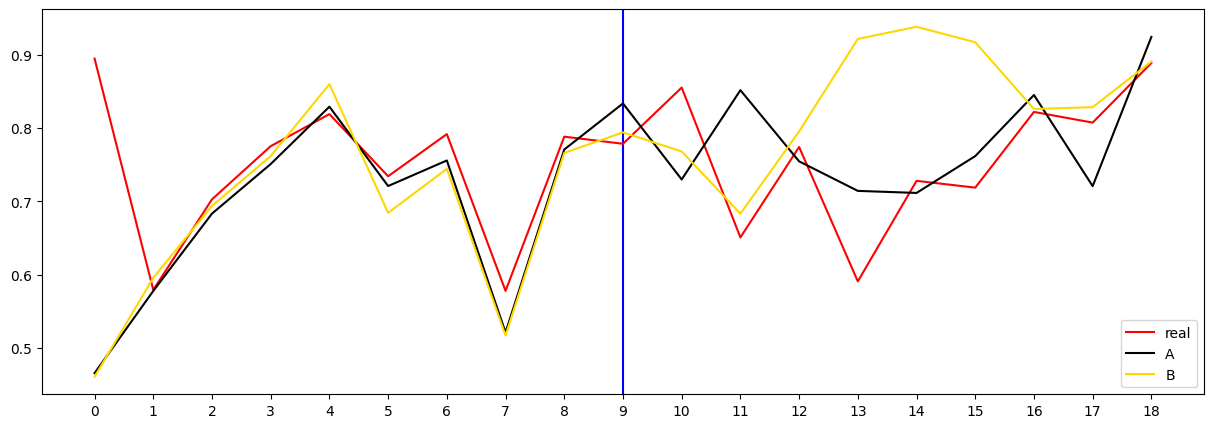

Which prediction is better? (A/B/skip): b
Saved preference.


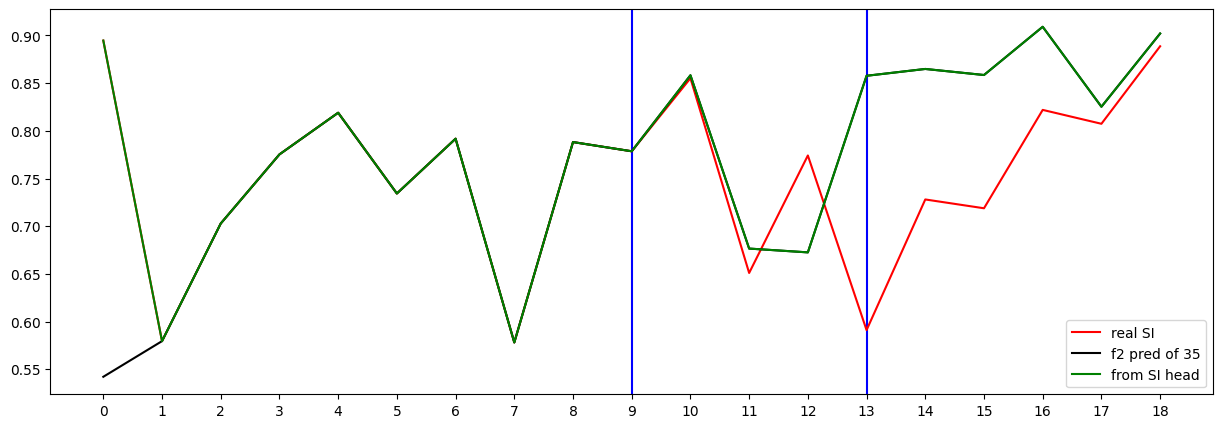

Testing R**2 - (all) - (no inputs):  0.9817088701023905
Testing R**2 - (f2) - SI full (no inputs):  -0.34614935991598617
Testing R**2 - SI head only (no inputs):  -0.34614935991598617
0 ...index R**2 (no inputs):  -1.1900003088310886
1 ...index R**2 (no inputs):  -11.516120549937261
2 ...index R**2 (no inputs):  -0.34614935991598617
3 ...index R**2 (no inputs):  -6187.523481710699
4 ...index R**2 (no inputs):  -941.7320193692125
5 ...index R**2 (no inputs):  -92.7154938923321
6 ...index R**2 (no inputs):  -5393.5986695342735
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.18244395368132538
10 ...index R**2 (no inputs):  -0.25423562018377255
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.220892513451612
16 ...index R**2 (no inputs):  -0.9224697012937257
17 ...index R**2 (no inputs):  -445.34388224283856
18 ...

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



[0] Train Loss: 1.315716
Loss_SI: 1.4012691974639893 Loss_all: 1.3091049194335938
===


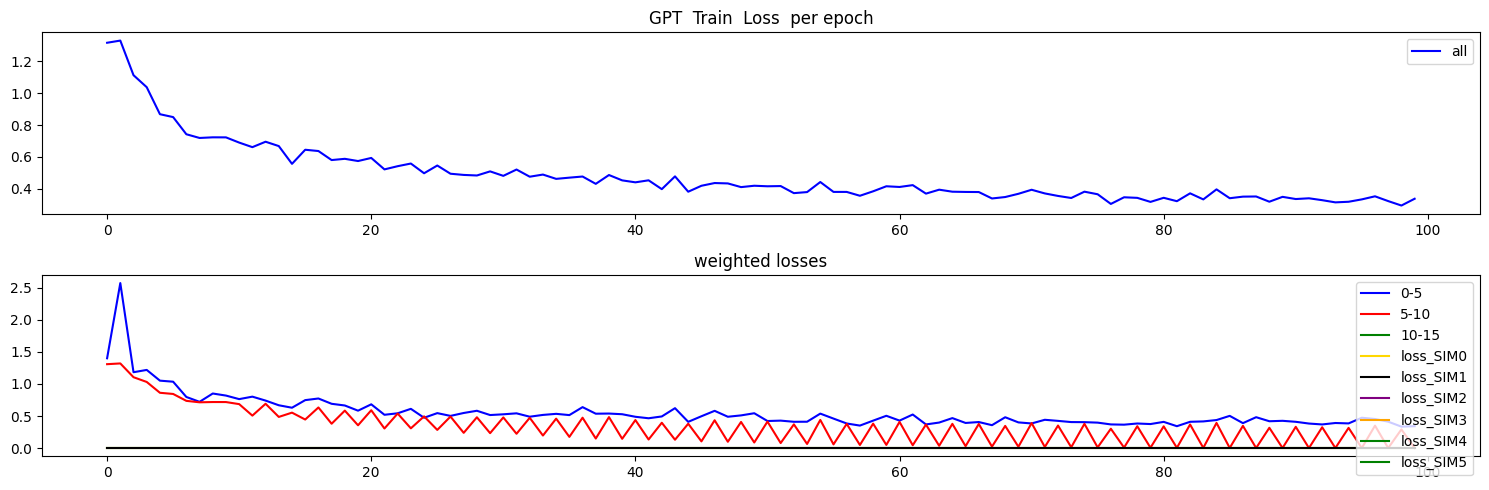

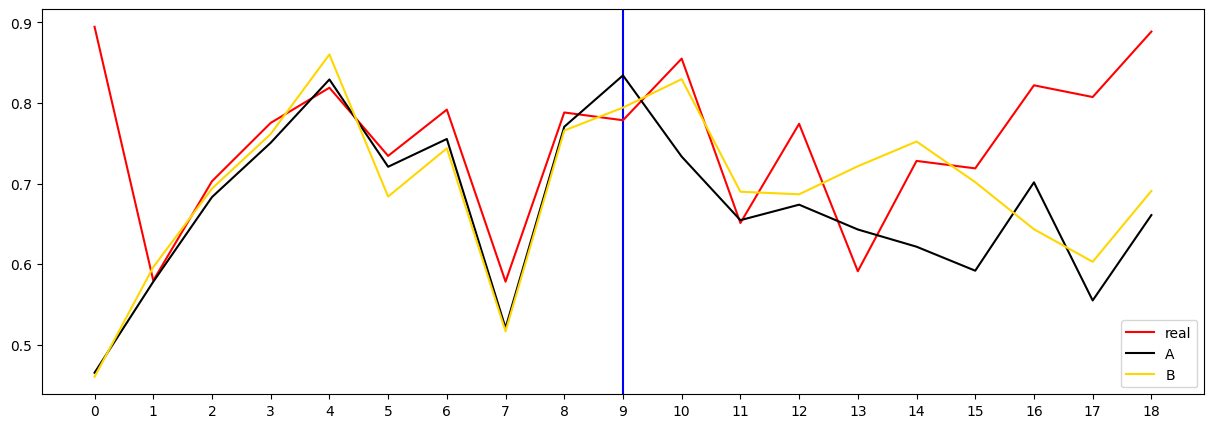

Which prediction is better? (A/B/skip): b
Saved preference.


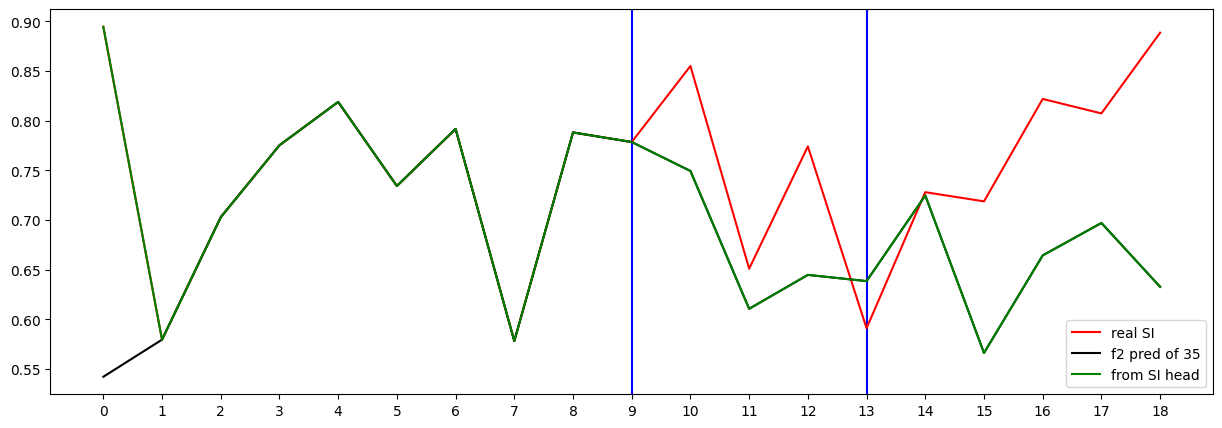

Testing R**2 - (all) - (no inputs):  0.9884069643932278
Testing R**2 - (f2) - SI full (no inputs):  -1.841422101936561
Testing R**2 - SI head only (no inputs):  -1.841422101936561
0 ...index R**2 (no inputs):  -0.2480566683196892
1 ...index R**2 (no inputs):  -0.9964759769116358
2 ...index R**2 (no inputs):  -1.841422101936561
3 ...index R**2 (no inputs):  -3069.303703805506
4 ...index R**2 (no inputs):  -83.44236238452501
5 ...index R**2 (no inputs):  -58.31283436365712
6 ...index R**2 (no inputs):  -60.555003384553864
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12271698368987782
10 ...index R**2 (no inputs):  0.42613315516424133
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.37790133224592326
16 ...index R**2 (no inputs):  -0.3321250217804066
17 ...index R**2 (no inputs):  -1213.3654012044271
18 ...inde

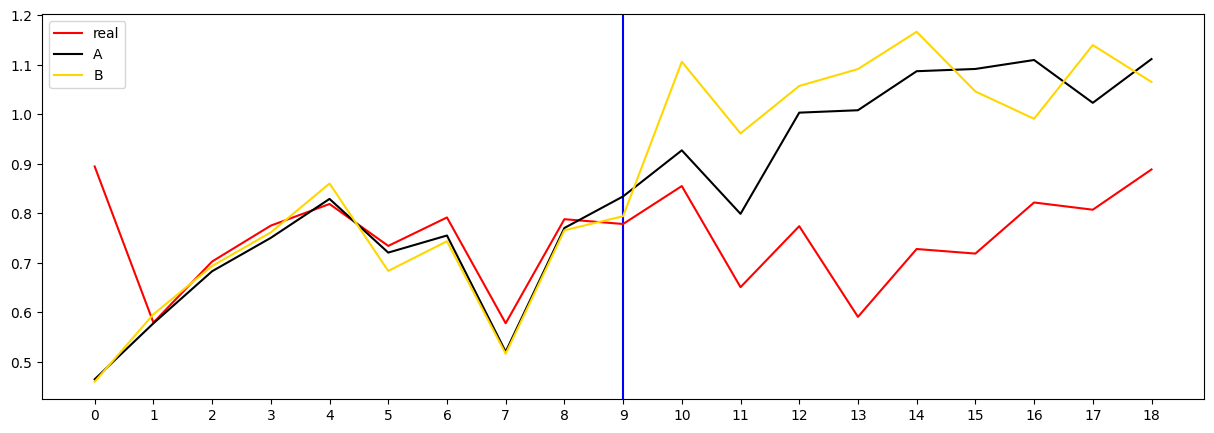

Which prediction is better? (A/B/skip): a
Saved preference.


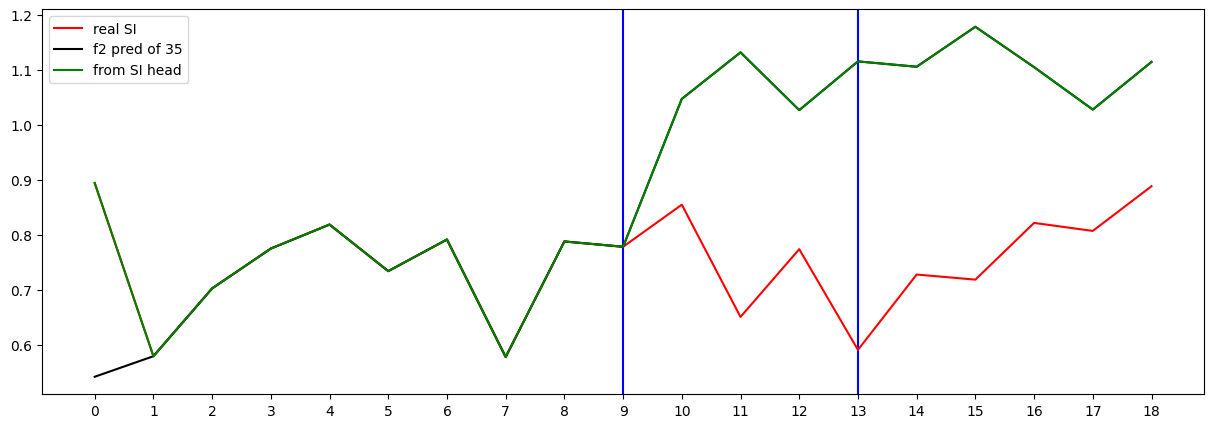

Testing R**2 - (all) - (no inputs):  0.9229408732006867
Testing R**2 - (f2) - SI full (no inputs):  -11.615474640595288
Testing R**2 - SI head only (no inputs):  -11.615474640595288
0 ...index R**2 (no inputs):  -6.723377651789994
1 ...index R**2 (no inputs):  -2.1767310086686695
2 ...index R**2 (no inputs):  -11.615474640595288
3 ...index R**2 (no inputs):  -2078.4924428600566
4 ...index R**2 (no inputs):  -2521.659301869588
5 ...index R**2 (no inputs):  -394.49842532283975
6 ...index R**2 (no inputs):  -3168.3841781311794
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.33247779501308017
10 ...index R**2 (no inputs):  -2.060019402601997
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.333297901610465
16 ...index R**2 (no inputs):  -0.7602749644449434
17 ...index R**2 (no inputs):  -214.78332659403483
18 ...ind

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.326440
Loss_SI: 1.417943000793457 Loss_all: 1.319779872894287
===


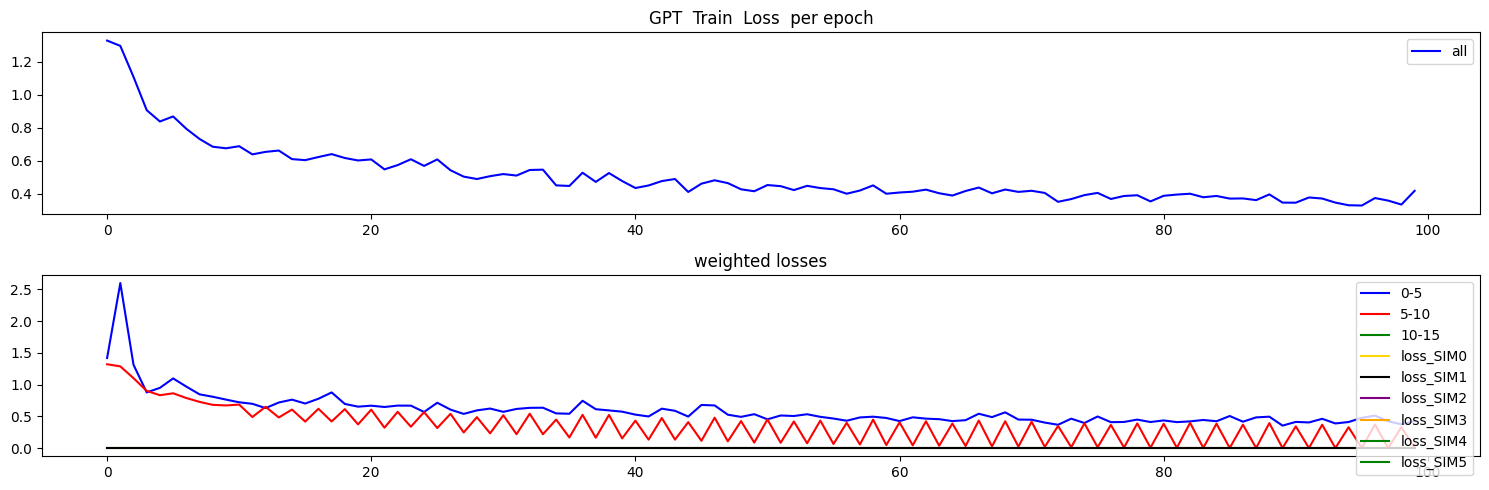

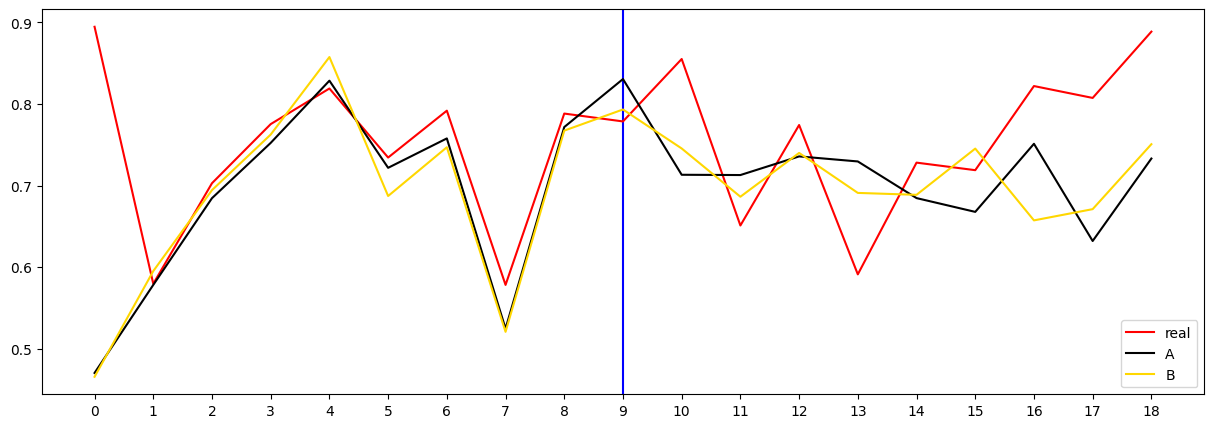

Which prediction is better? (A/B/skip): b
Saved preference.


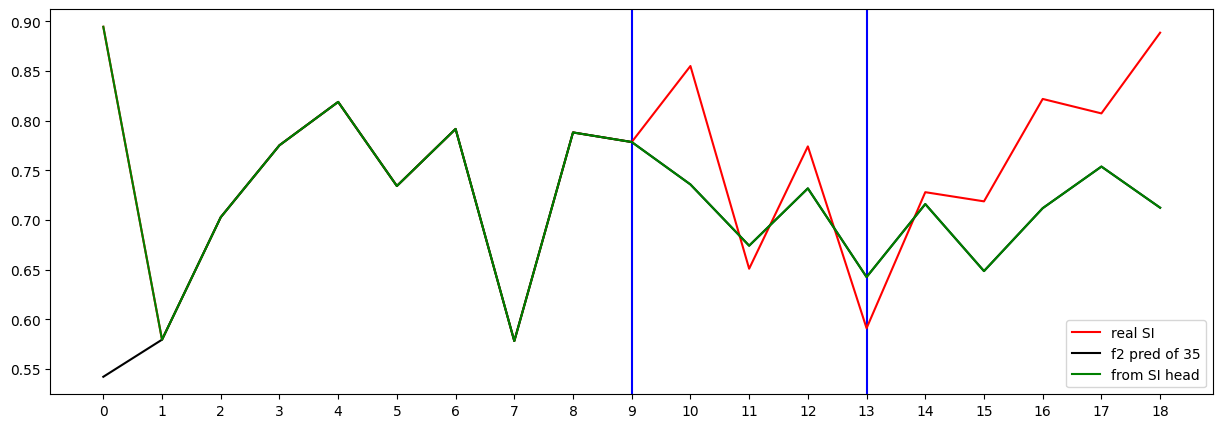

Testing R**2 - (all) - (no inputs):  0.9887185663661016
Testing R**2 - (f2) - SI full (no inputs):  -0.6064260492094677
Testing R**2 - SI head only (no inputs):  -0.6064260492094677
0 ...index R**2 (no inputs):  -0.18858990427089672
1 ...index R**2 (no inputs):  -1.41234426160988
2 ...index R**2 (no inputs):  -0.6064260492094677
3 ...index R**2 (no inputs):  -3233.175137825708
4 ...index R**2 (no inputs):  -17.131243045149983
5 ...index R**2 (no inputs):  -56.99535929797037
6 ...index R**2 (no inputs):  -174.48703753758102
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0007207726327957964
10 ...index R**2 (no inputs):  0.06675379897905731
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.26276393820548805
16 ...index R**2 (no inputs):  -0.3183684529834241
17 ...index R**2 (no inputs):  -247.0695442199707
18 ...

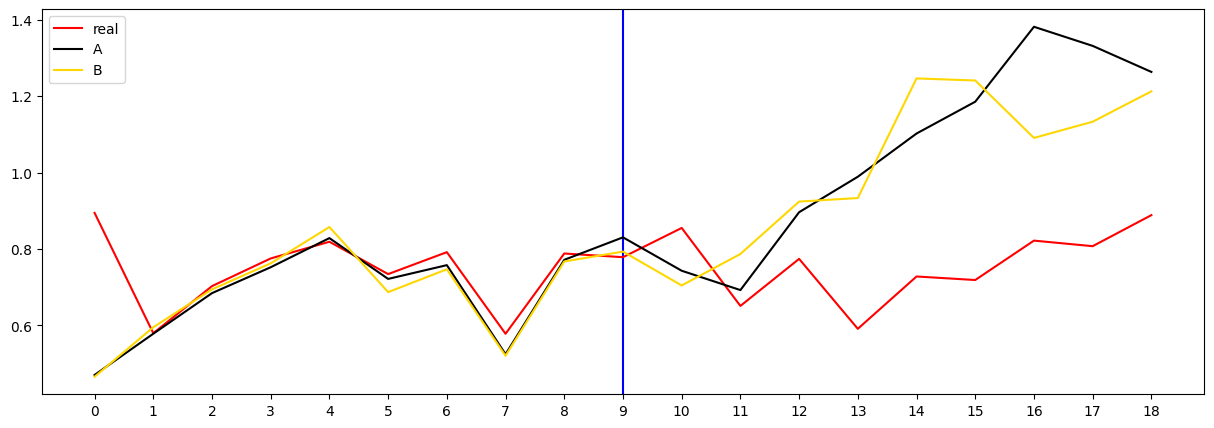

Which prediction is better? (A/B/skip): a
Saved preference.


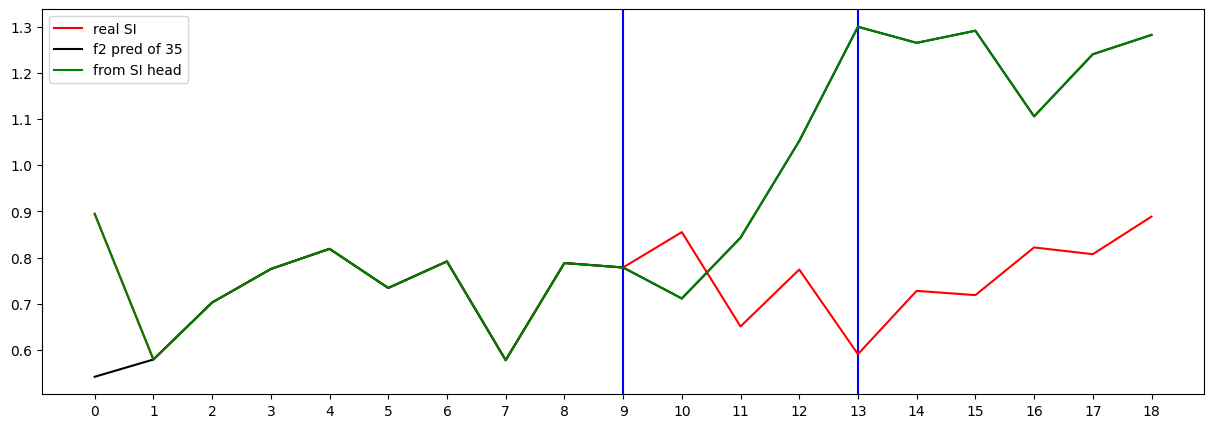

Testing R**2 - (all) - (no inputs):  0.9723162058278467
Testing R**2 - (f2) - SI full (no inputs):  -15.996181172681649
Testing R**2 - SI head only (no inputs):  -15.996181172681649
0 ...index R**2 (no inputs):  -1.2307413368439324
1 ...index R**2 (no inputs):  -15.213587406383585
2 ...index R**2 (no inputs):  -15.996181172681649
3 ...index R**2 (no inputs):  -1714.9700399551477
4 ...index R**2 (no inputs):  -1804.8519630569194
5 ...index R**2 (no inputs):  -138.42463138087547
6 ...index R**2 (no inputs):  -312.08442163858507
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.01628919427245412
10 ...index R**2 (no inputs):  -1.1798022361978155
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.717903645965975
16 ...index R**2 (no inputs):  -0.866466606648459
17 ...index R**2 (no inputs):  -5490.323145548503
18 ...in

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




## Run 3


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.159173
Loss_SI: 1.4541095495224 Loss_all: 1.1525609493255615
===


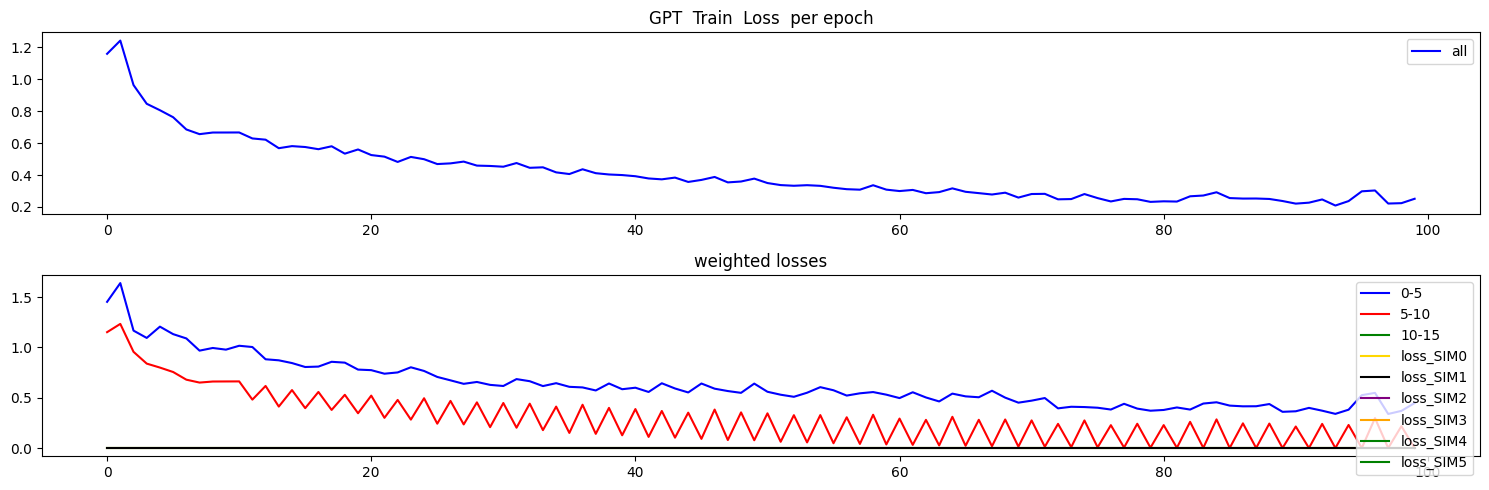

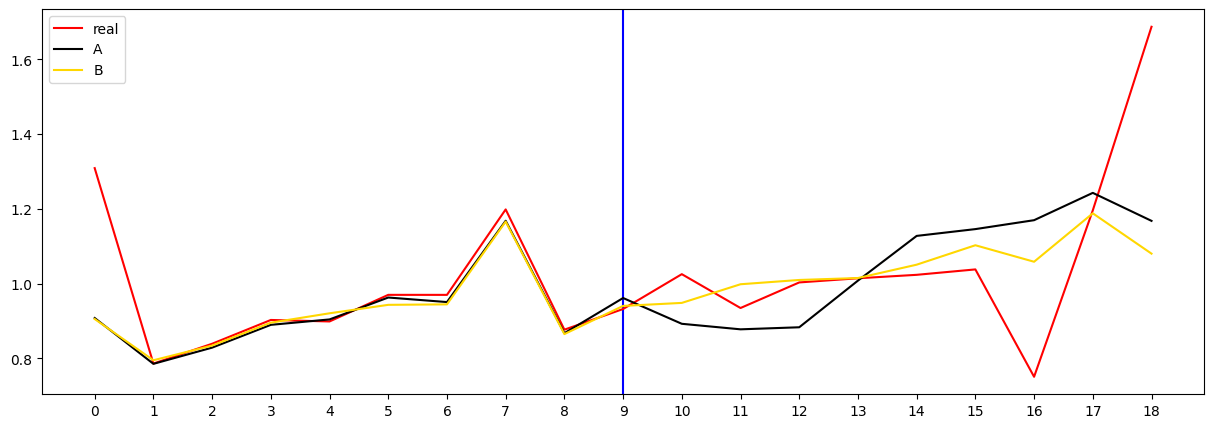

Which prediction is better? (A/B/skip): b
Saved preference.


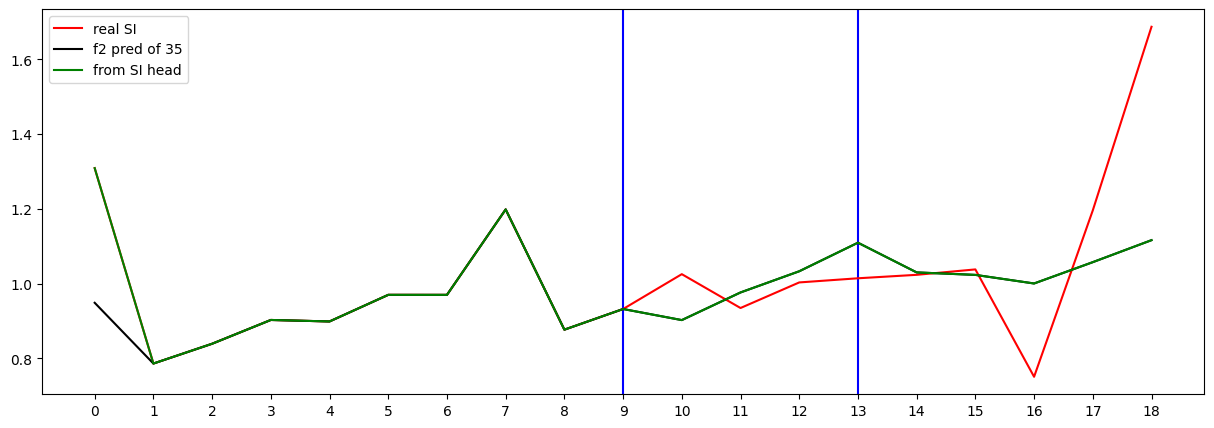

Testing R**2 - (all) - (no inputs):  0.9918527325387547
Testing R**2 - (f2) - SI full (no inputs):  0.029884359675626637
Testing R**2 - SI head only (no inputs):  0.029884359675626637
0 ...index R**2 (no inputs):  0.01645546888398719
1 ...index R**2 (no inputs):  -0.3971200732365172
2 ...index R**2 (no inputs):  0.029884359675626637
3 ...index R**2 (no inputs):  -0.33609525328108125
4 ...index R**2 (no inputs):  -3.2899940098816565
5 ...index R**2 (no inputs):  -1.953768924256737
6 ...index R**2 (no inputs):  -2.7361487788030208
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5717398671827076
10 ...index R**2 (no inputs):  -0.2037095060664531
11 ...index R**2 (no inputs):  -9.339056133656355
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.240260874975486
16 ...index R**2 (no inputs):  -0.9239125730744664
17 ...index R**2 (no inputs):  -28.53481

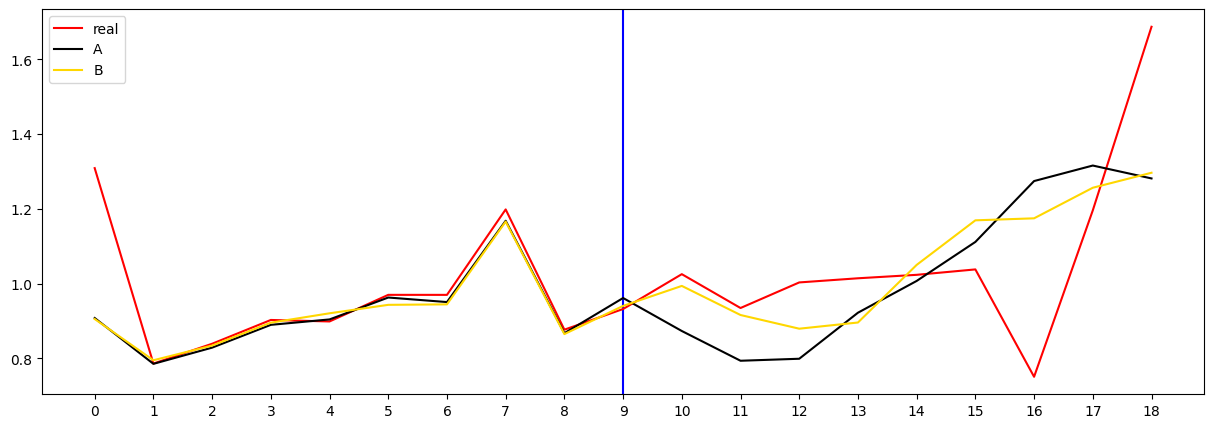

Which prediction is better? (A/B/skip): b
Saved preference.


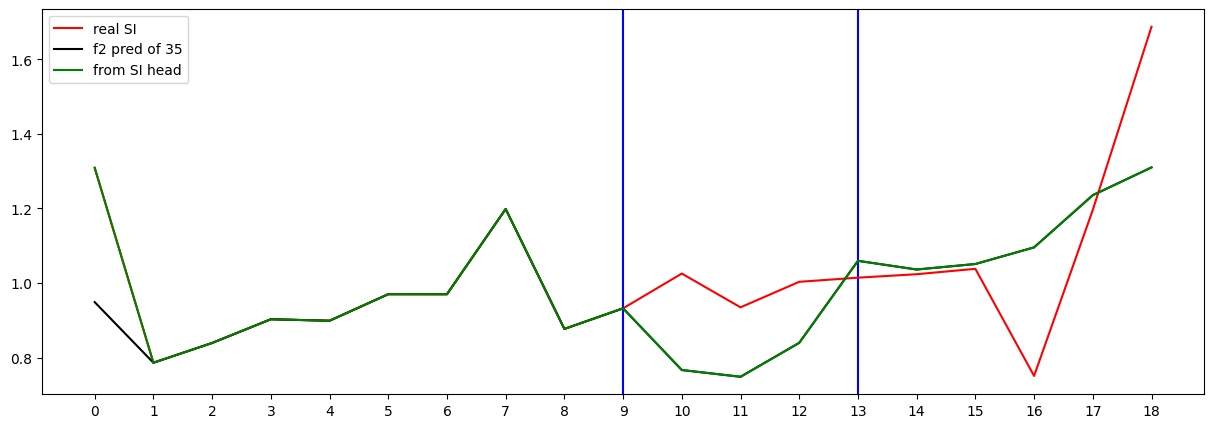

Testing R**2 - (all) - (no inputs):  0.9521881840065816
Testing R**2 - (f2) - SI full (no inputs):  0.25095045838633767
Testing R**2 - SI head only (no inputs):  0.25095045838633767
0 ...index R**2 (no inputs):  -0.049387302121139065
1 ...index R**2 (no inputs):  -1.814886795785133
2 ...index R**2 (no inputs):  0.25095045838633767
3 ...index R**2 (no inputs):  -0.4486997117668703
4 ...index R**2 (no inputs):  -8.579038331227508
5 ...index R**2 (no inputs):  -16.351999007878014
6 ...index R**2 (no inputs):  -21.420630831066788
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.42164503150545096
10 ...index R**2 (no inputs):  0.2946243490993068
11 ...index R**2 (no inputs):  -193.7244575107087
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5134253868911134
16 ...index R**2 (no inputs):  -0.5813479485120208
17 ...index R**2 (no inputs):  -313.330219

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.186801
Loss_SI: 1.1323808431625366 Loss_all: 1.180127501487732
===


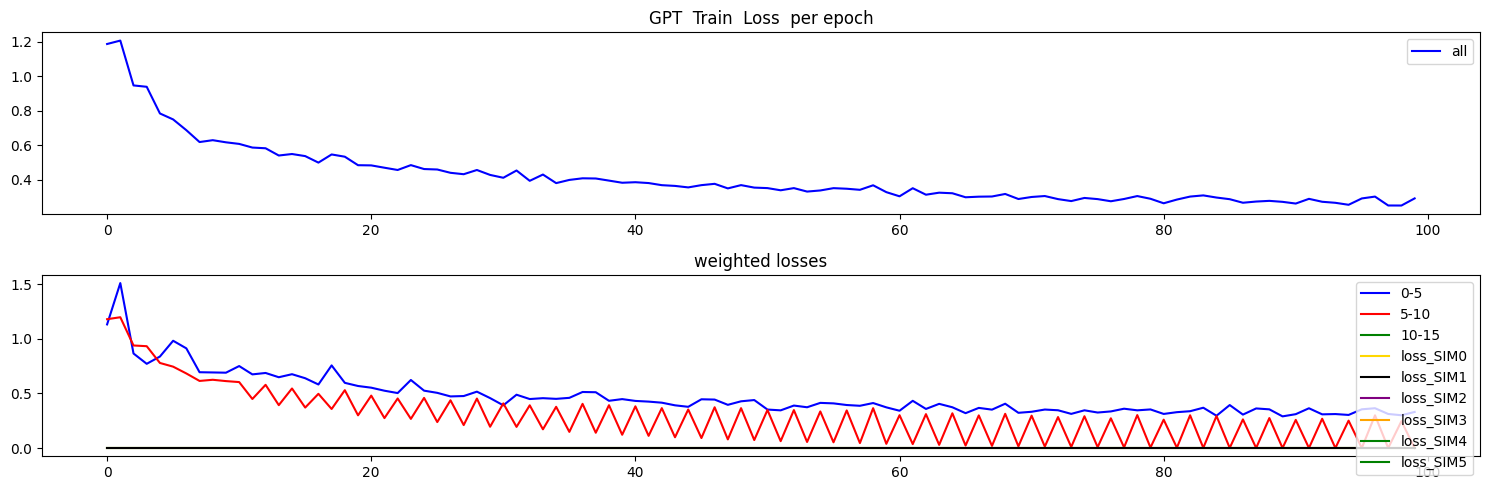

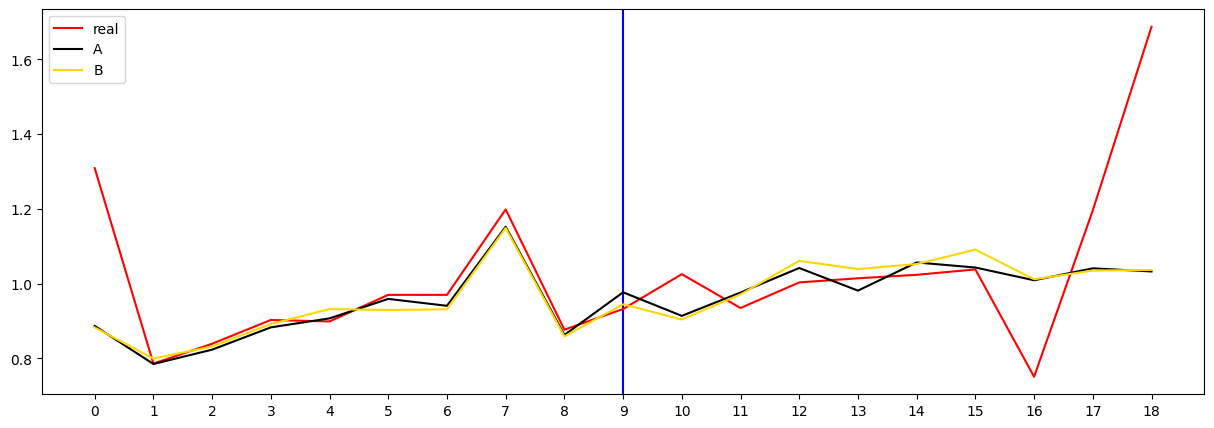

Which prediction is better? (A/B/skip): s


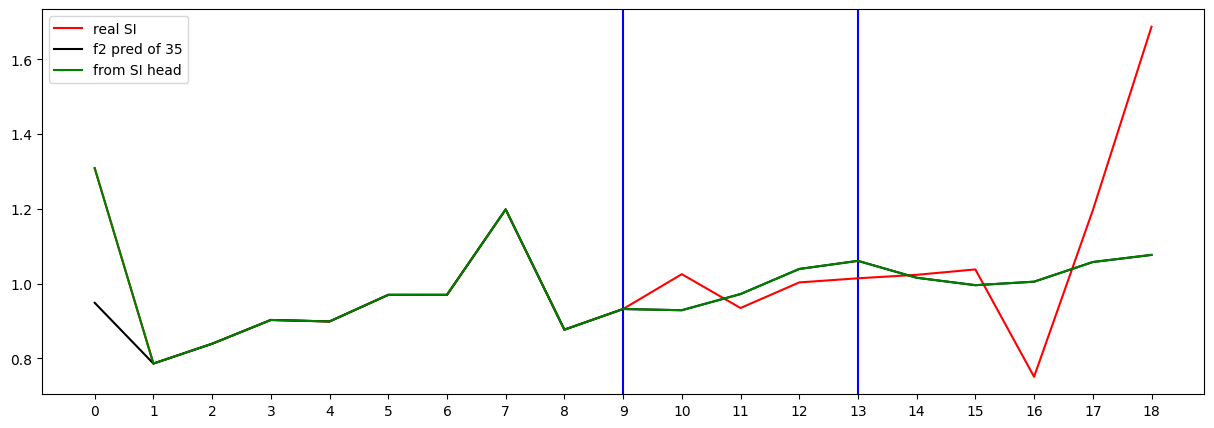

Testing R**2 - (all) - (no inputs):  0.9936904436925185
Testing R**2 - (f2) - SI full (no inputs):  0.04004580033413985
Testing R**2 - SI head only (no inputs):  0.04004580033413985
0 ...index R**2 (no inputs):  0.0943074930422052
1 ...index R**2 (no inputs):  -0.15068748832034884
2 ...index R**2 (no inputs):  0.04004580033413985
3 ...index R**2 (no inputs):  -1.084260357546242
4 ...index R**2 (no inputs):  -1.4889792888465396
5 ...index R**2 (no inputs):  -1.2871304674244173
6 ...index R**2 (no inputs):  -0.9738085547483635
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.061218847429377776
10 ...index R**2 (no inputs):  -0.24273809073827213
11 ...index R**2 (no inputs):  -11.806753662145132
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.885910514875505
16 ...index R**2 (no inputs):  -0.9009476247340487
17 ...index R**2 (no inputs):  -44.32826

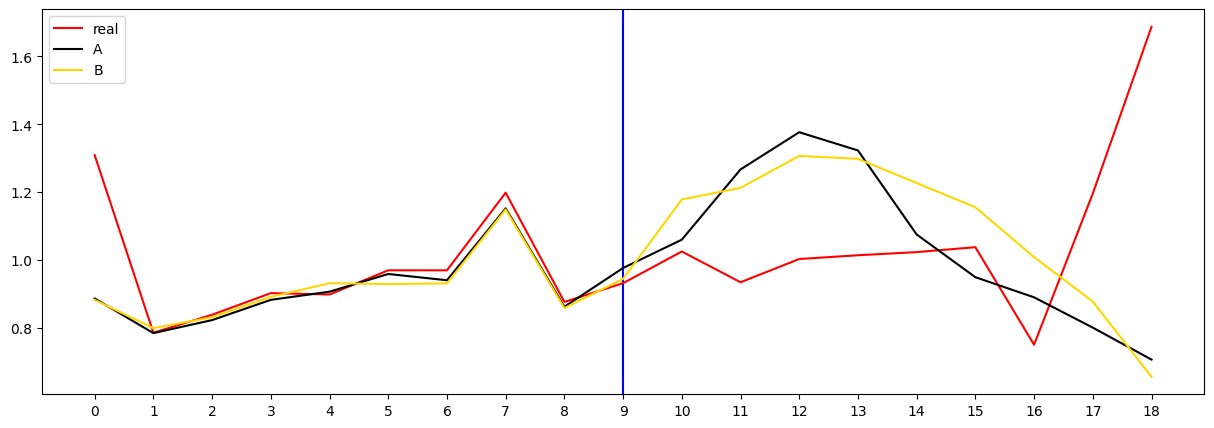

Which prediction is better? (A/B/skip): s


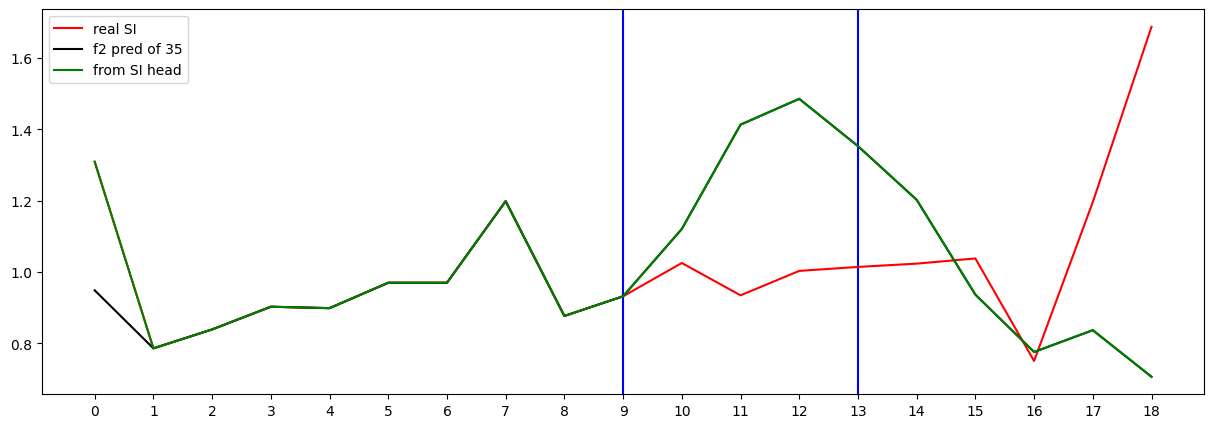

Testing R**2 - (all) - (no inputs):  0.6276666191819018
Testing R**2 - (f2) - SI full (no inputs):  -2.2400255462235794
Testing R**2 - SI head only (no inputs):  -2.2400255462235794
0 ...index R**2 (no inputs):  -0.4837070720422225
1 ...index R**2 (no inputs):  -3.3189708254684875
2 ...index R**2 (no inputs):  -2.2400255462235794
3 ...index R**2 (no inputs):  -21.347593170722316
4 ...index R**2 (no inputs):  -746.9004048228272
5 ...index R**2 (no inputs):  -134.13794774069237
6 ...index R**2 (no inputs):  -32.860440694548494
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2685674171643051
10 ...index R**2 (no inputs):  -1.5645254362466154
11 ...index R**2 (no inputs):  -1490.7295028105732
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -14.419178078245636
16 ...index R**2 (no inputs):  -1.9380094229248659
17 ...index R**2 (no inputs):  -3725.55676

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




[0] Train Loss: 1.186066
Loss_SI: 1.1773545742034912 Loss_all: 1.1793551445007324
===


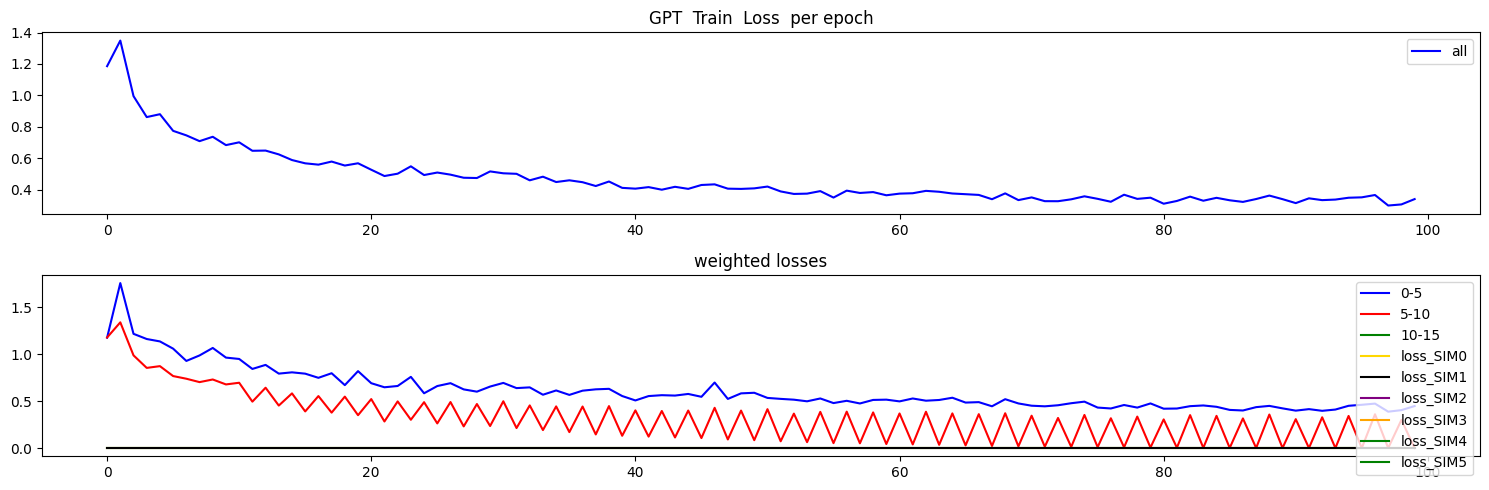

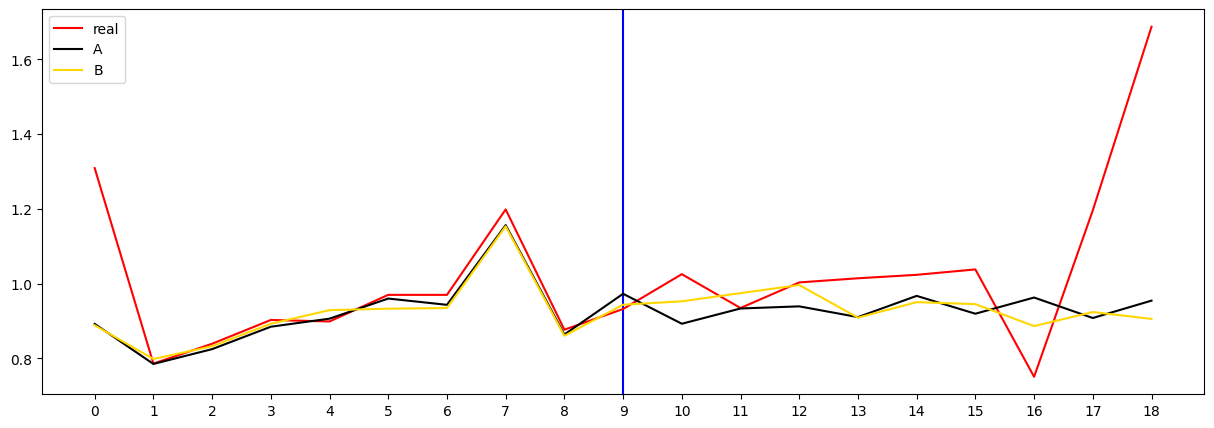

Which prediction is better? (A/B/skip): s


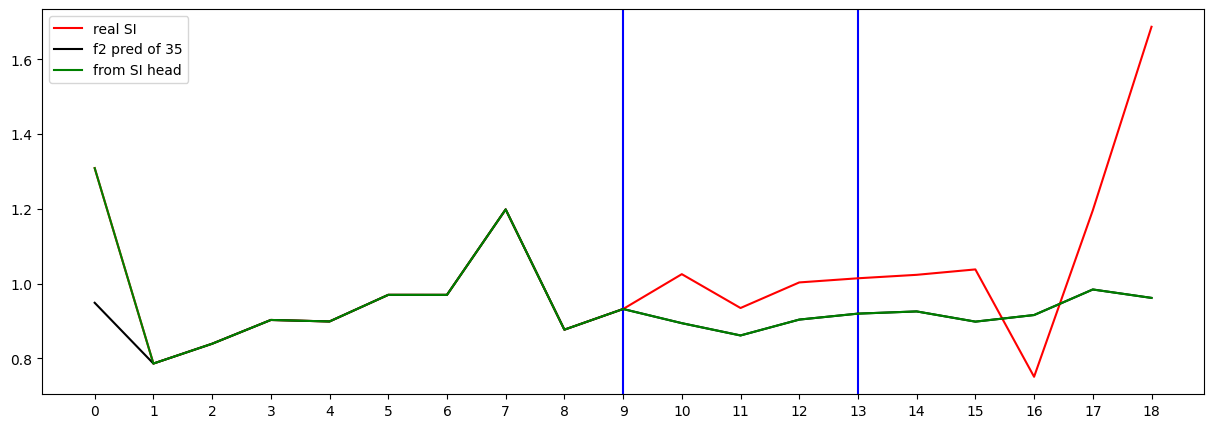

Testing R**2 - (all) - (no inputs):  0.9843599717491839
Testing R**2 - (f2) - SI full (no inputs):  -0.34753593904136104
Testing R**2 - SI head only (no inputs):  -0.34753593904136104
0 ...index R**2 (no inputs):  0.03506716081792549
1 ...index R**2 (no inputs):  -0.709652550969319
2 ...index R**2 (no inputs):  -0.34753593904136104
3 ...index R**2 (no inputs):  -0.053033440030143764
4 ...index R**2 (no inputs):  -1.9516652208621368
5 ...index R**2 (no inputs):  -4.679390259738238
6 ...index R**2 (no inputs):  -4.326730140999591
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.012229842006311387
10 ...index R**2 (no inputs):  -0.12357730062921757
11 ...index R**2 (no inputs):  -16.09327090485407
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.07773971151008
16 ...index R**2 (no inputs):  -0.5121304416886951
17 ...index R**2 (no inputs):  -43.4018

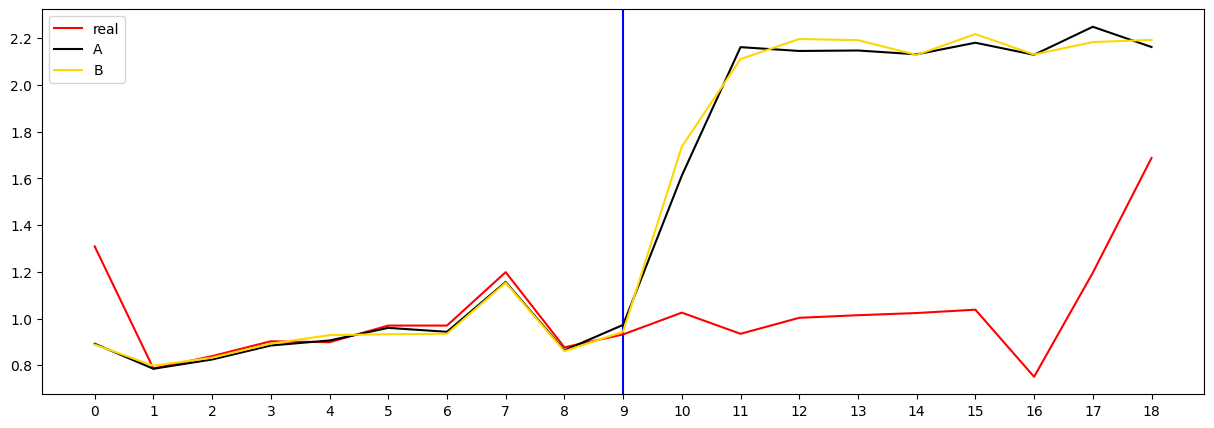

Which prediction is better? (A/B/skip): s


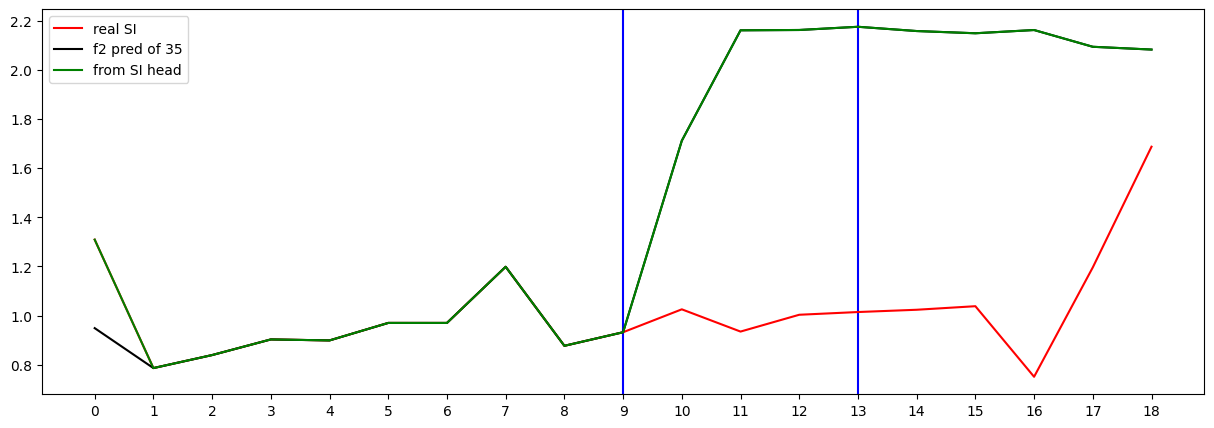

Testing R**2 - (all) - (no inputs):  0.7568855205965819
Testing R**2 - (f2) - SI full (no inputs):  -15.569759957622946
Testing R**2 - SI head only (no inputs):  -15.569759957622946
0 ...index R**2 (no inputs):  -0.41887388978110396
1 ...index R**2 (no inputs):  -17.96263283069107
2 ...index R**2 (no inputs):  -15.569759957622946
3 ...index R**2 (no inputs):  -108.81811423986589
4 ...index R**2 (no inputs):  -1232.1206469435554
5 ...index R**2 (no inputs):  -86.79239798490191
6 ...index R**2 (no inputs):  -40.73717656947924
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7568039892145473
10 ...index R**2 (no inputs):  -0.3996435148116666
11 ...index R**2 (no inputs):  -1134.093491090268
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -29.875875336409045
16 ...index R**2 (no inputs):  -4.18580012193978
17 ...index R**2 (no inputs):  -6659.524959848

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.183771
Loss_SI: 1.1145987510681152 Loss_all: 1.177113652229309
===


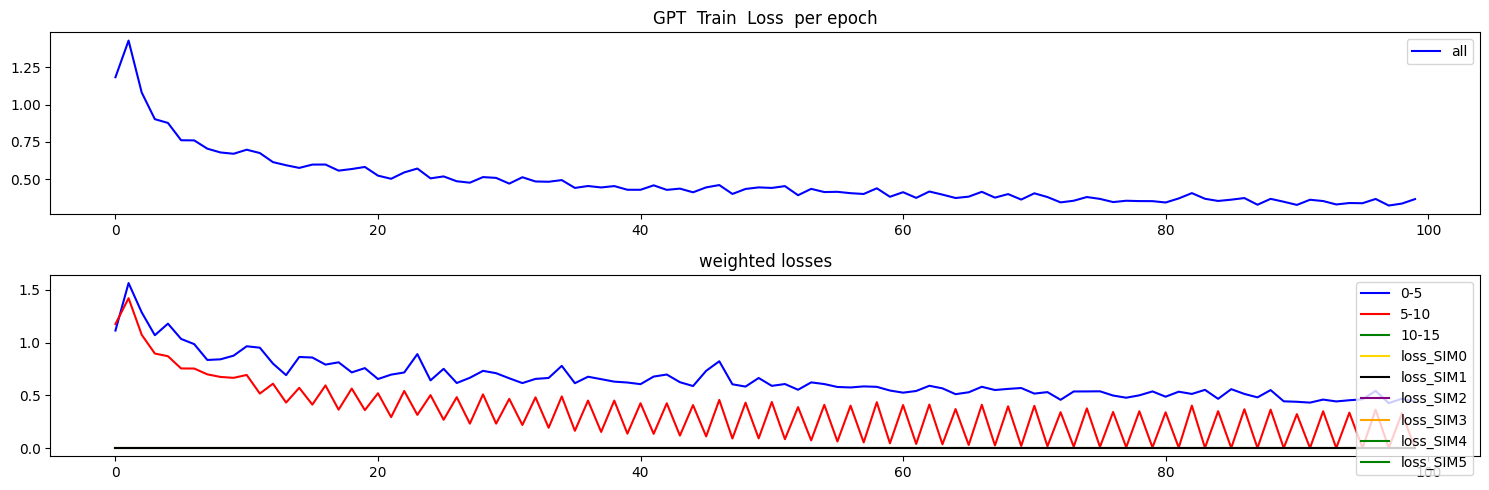

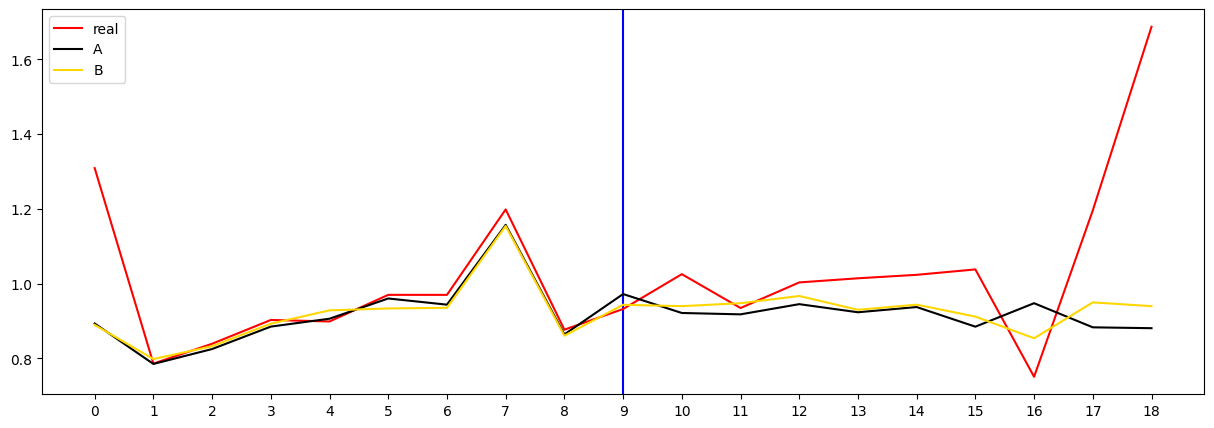

Which prediction is better? (A/B/skip): b
Saved preference.


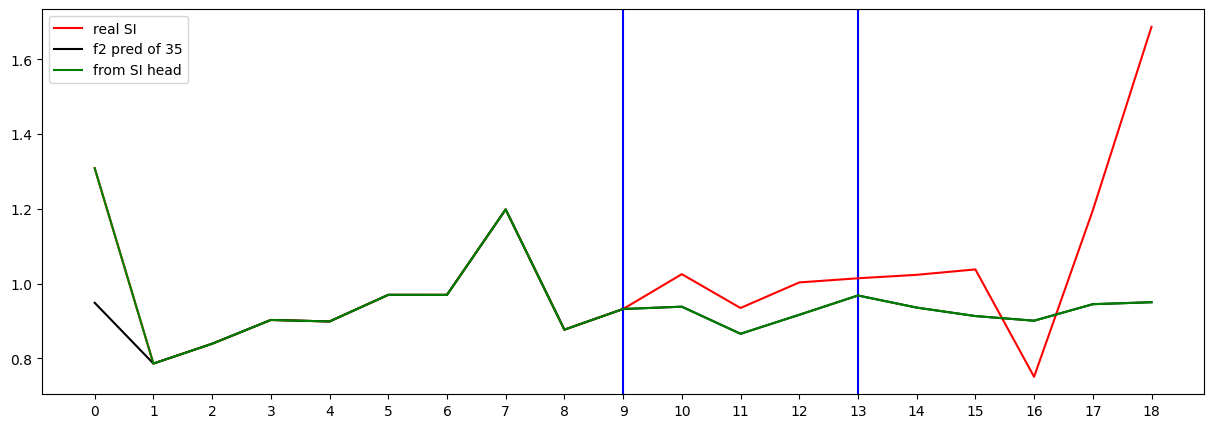

Testing R**2 - (all) - (no inputs):  0.9793787223486148
Testing R**2 - (f2) - SI full (no inputs):  -0.45737042872673905
Testing R**2 - SI head only (no inputs):  -0.45737042872673905
0 ...index R**2 (no inputs):  0.04730673204681779
1 ...index R**2 (no inputs):  -0.5564453832134022
2 ...index R**2 (no inputs):  -0.45737042872673905
3 ...index R**2 (no inputs):  -0.7644707851208454
4 ...index R**2 (no inputs):  -0.948445657838711
5 ...index R**2 (no inputs):  -6.491236895836156
6 ...index R**2 (no inputs):  -1.0533603348030236
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.041987592327895173
10 ...index R**2 (no inputs):  -0.20258836784990653
11 ...index R**2 (no inputs):  -57.489207872089075
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.180551593945536
16 ...index R**2 (no inputs):  -0.4664482158600287
17 ...index R**2 (no inputs):  -38.122

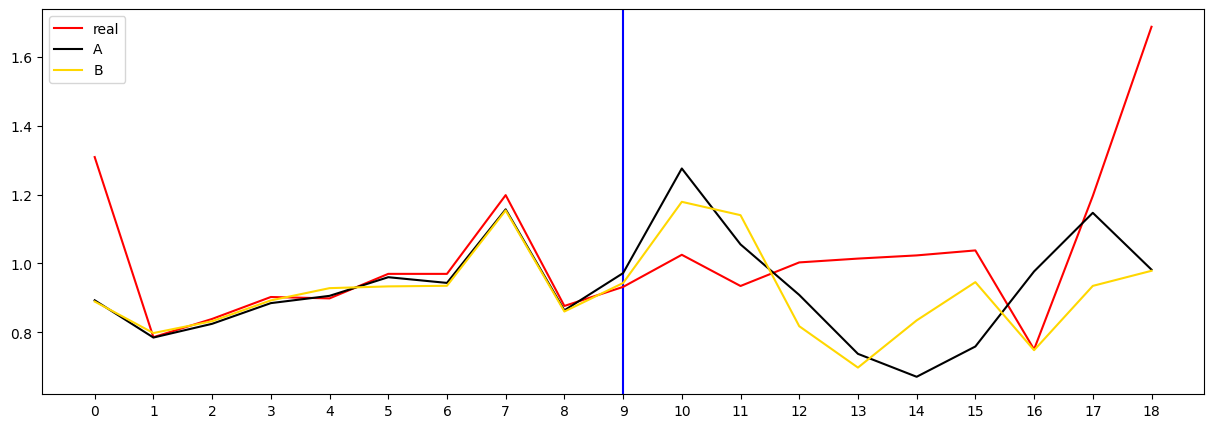

Which prediction is better? (A/B/skip): s


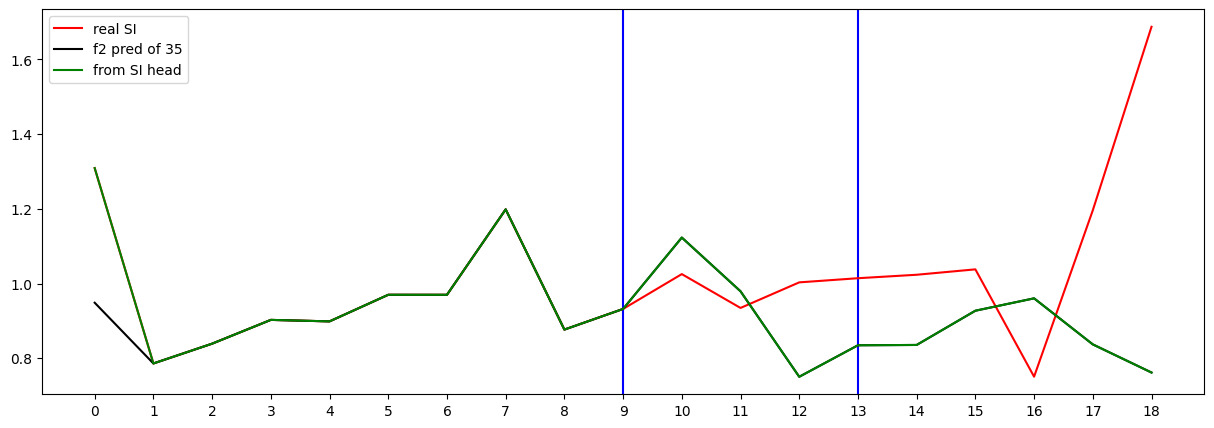

Testing R**2 - (all) - (no inputs):  0.9189766751071611
Testing R**2 - (f2) - SI full (no inputs):  -1.2523149327519056
Testing R**2 - SI head only (no inputs):  -1.2523149327519056
0 ...index R**2 (no inputs):  -0.5327085131448361
1 ...index R**2 (no inputs):  -0.8556326803602614
2 ...index R**2 (no inputs):  -1.2523149327519056
3 ...index R**2 (no inputs):  -22.083950497273946
4 ...index R**2 (no inputs):  -160.57668408514158
5 ...index R**2 (no inputs):  -28.166251854918837
6 ...index R**2 (no inputs):  -38.59324309882344
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.17435104771224452
10 ...index R**2 (no inputs):  -0.015180482400996675
11 ...index R**2 (no inputs):  -964.5493839814802
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.913603271745161
16 ...index R**2 (no inputs):  -0.6024190188563343
17 ...index R**2 (no inputs):  -5197.0674

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.167307
Loss_SI: 1.3598800897598267 Loss_all: 1.1606019735336304
===


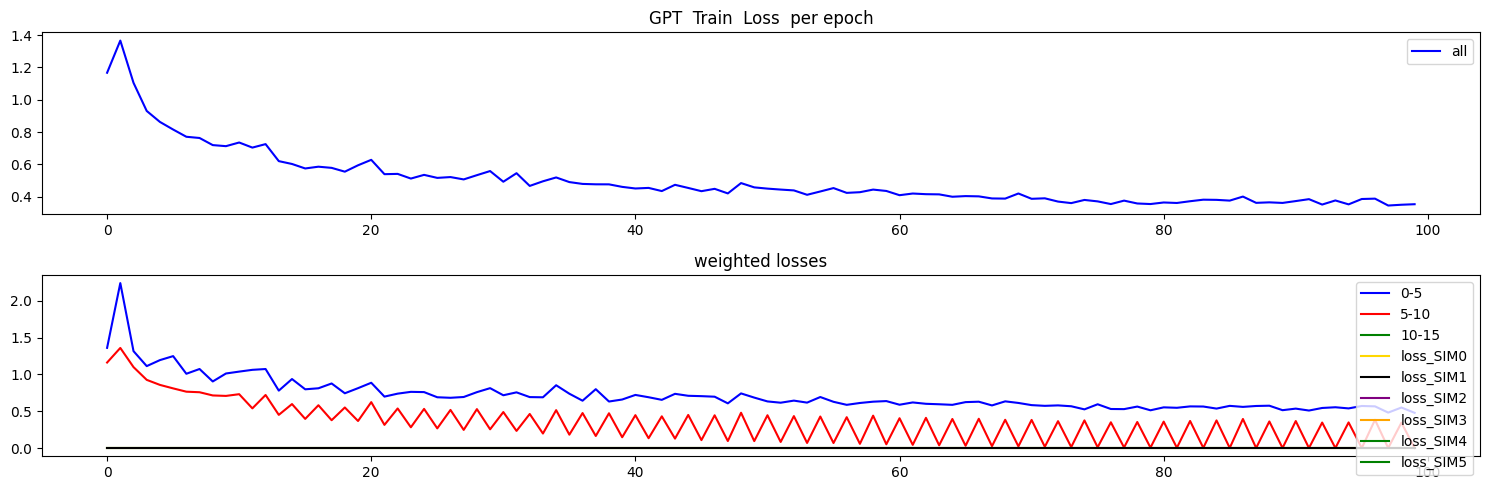

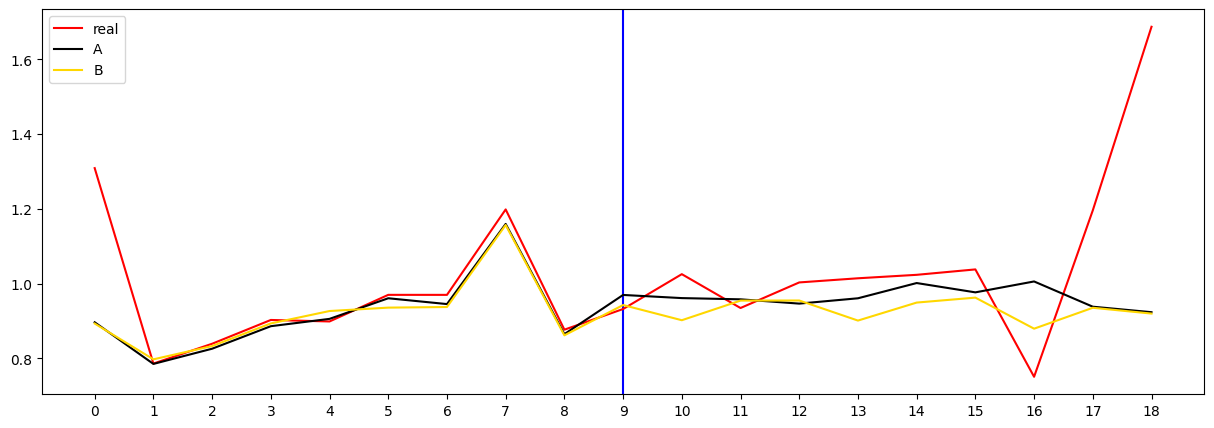

Which prediction is better? (A/B/skip): a
Saved preference.


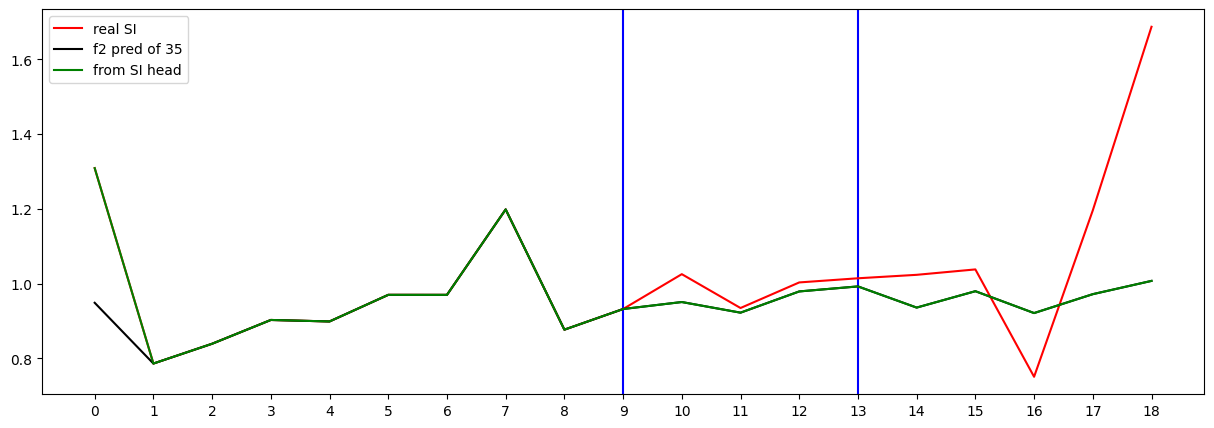

Testing R**2 - (all) - (no inputs):  0.9878792311183332
Testing R**2 - (f2) - SI full (no inputs):  -0.3091661282365754
Testing R**2 - SI head only (no inputs):  -0.3091661282365754
0 ...index R**2 (no inputs):  0.03434014188600942
1 ...index R**2 (no inputs):  -0.4132925334768156
2 ...index R**2 (no inputs):  -0.3091661282365754
3 ...index R**2 (no inputs):  -0.7101713111544175
4 ...index R**2 (no inputs):  -0.7924853146944273
5 ...index R**2 (no inputs):  -3.398071031953698
6 ...index R**2 (no inputs):  -2.197666840219177
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1047974271293799
10 ...index R**2 (no inputs):  -0.18068297056688198
11 ...index R**2 (no inputs):  -51.88633294058209
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.2909011931229015
16 ...index R**2 (no inputs):  -0.5684812287661933
17 ...index R**2 (no inputs):  -78.74549564

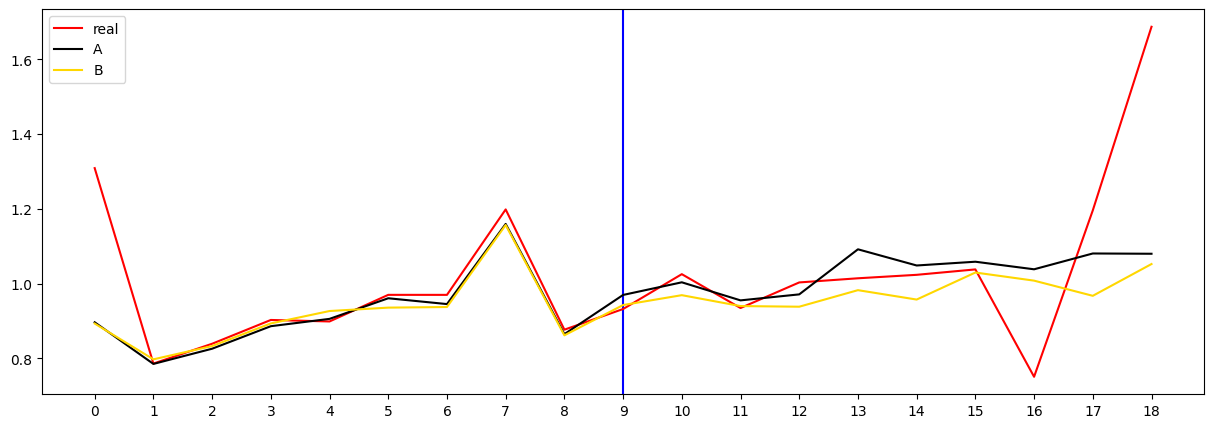

Which prediction is better? (A/B/skip): s


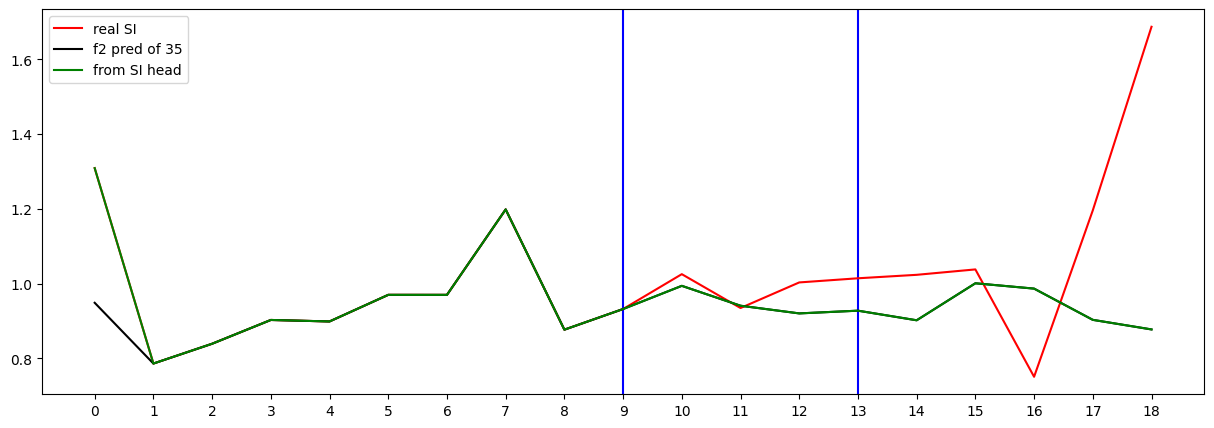

Testing R**2 - (all) - (no inputs):  0.8959585458961419
Testing R**2 - (f2) - SI full (no inputs):  -0.6604448318483565
Testing R**2 - SI head only (no inputs):  -0.6604448318483565
0 ...index R**2 (no inputs):  -0.37936070230849106
1 ...index R**2 (no inputs):  -1.1058226920230516
2 ...index R**2 (no inputs):  -0.6604448318483565
3 ...index R**2 (no inputs):  -54.5114532438738
4 ...index R**2 (no inputs):  -232.7365379951548
5 ...index R**2 (no inputs):  -36.55110322697197
6 ...index R**2 (no inputs):  -134.30142857136534
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1593383672072879
10 ...index R**2 (no inputs):  -0.16294429576407565
11 ...index R**2 (no inputs):  -941.8356923309951
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.766856378076424
16 ...index R**2 (no inputs):  -2.7117754807495777
17 ...index R**2 (no inputs):  -5099.61379813

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )





## R2 over accumulated Runs


In [43]:

inferenceGPT_obj.print_ALL_R2s_THE_END()


====================================400to500
1 .....................R² on first n steps - R²: 0.3260366509562105
Naive_R2:....................................R²: 0.7736
RMSE:0.1177,MAE:0.1008,MASE:0.3335
1 .......................R² on just step n - R²: 0.3260366509562105
Naive_R2:....................................R²: 0.7736
RMSE:0.1177,MAE:0.1008,MASE:0.3335
2 .....................R² on first n steps - R²: 0.05171633673580878
Naive_R2:....................................R²: 0.3920
RMSE:0.1264,MAE:0.0990,MASE:0.7068
2 .......................R² on just step n - R²: -0.674112860451092
Naive_R2:....................................R²: 0.4402
RMSE:0.1346,MAE:0.0971,MASE:0.4411
3 .....................R² on first n steps - R²: 0.3532535432024162
Naive_R2:....................................R²: 0.4172
RMSE:0.1226,MAE:0.0928,MASE:0.6893
3 .......................R² on just step n - R²: 0.5638356206082745
Naive_R2:....................................R²: 0.8143
RMSE:0.1145,MAE:0.0806,MASE:0.2667


In [44]:

print("End")


End
